In [1]:
"""
20210915 Vamos a hacer un notebook de prueba clasificando movimientos por geolocalizaciones
"""

'\n20210915 Vamos a hacer un notebook de prueba clasificando movimientos por geolocalizaciones\n'

In [324]:
import pandas
from pandas import read_excel, date_range, DataFrame, concat, to_datetime
import numpy

from matplotlib import pyplot
import statistics
from pandas.plotting import lag_plot, autocorrelation_plot
from prophet import Prophet

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
# Load data using read_excel
transacciones_df = read_excel('20210915_geo_mmelero(249236).xlsx', sheet_name='mmelero')
transacciones_df

,"""TRANSACTION_DATE""",Fecha transacción,Importe,ID Categoría,Nombre categoría,Nivel categoría,iD categoría padre,Nombre categoría padre,Proveedor,Latitud,Longitud,CP,Ciudad,País,Marca,Sector,Financiero,Transferencia,Unnamed: 18
0,"""2020-07-24""",-1.20,84.0,84.0,category.parking_84,2.0,5.0,category.vehiculos_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN
1,"""2020-07-23""",-4.50,117.0,117.0,category.regalos_celebraciones_117,2.0,8.0,category.gastos_personales_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN
2,"""2020-07-23""",-13.53,70.0,70.0,category.supermercados_70,2.0,4.0,category.alimentacion_4,SPAR,NaN,NaN,"""""","""""",España,SPAR,Supermercados,False,False,NaN
3,"""2020-07-22""",-51.40,222.0,222.0,category.adsl_222,3.0,521.0,Comunicaciones y TV,Jazz Telecom,NaN,NaN,"""""","""""",España,Jazztel,Compañías telecomunicaciones,False,False,NaN
4,"""2020-07-22""",-11.00,70.0,70.0,category.supermercados_70,2.0,4.0,category.alimentacion_4,Mercadona,NaN,NaN,"""""","""""",España,Mercadona,Supermercados,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,"""2016-09-05""",1533.02,18.0,18.0,category.retribucion_liquida_18,3.0,576.0,Nómina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN
1483,"""2016-09-05""",-617.47,126.0,126.0,category.liquidacion_tarjeta_126,3.0,478.0,category.tarjetas_credito_478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN
1484,"""2016-09-05""",-138.08,125.0,125.0,category.cuotas_125,3.0,127.0,category.otros_pasivos_127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN
1485,"""2016-09-01""",-32.22,90.0,90.0,category.seguro_salud_90,2.0,6.0,category.salud_6,Sanitas S.A. de Seguros,NaN,NaN,"""""","""""",España,Sanitas,Seguros de salud,True,False,NaN


In [4]:
# vamos a quedarnos con las columnas de las transacciones q nos importan incluyendo la localizacion

# "TRANSACTION_DATE"
# Fecha transacción
# Importe
# ID Categoría
# Latitud
# Longitud
# CP
# Ciudad
# Pais

In [5]:
statistics_df = transacciones_df.iloc[:, 0:14]
statistics_df

,"""TRANSACTION_DATE""",Fecha transacción,Importe,ID Categoría,Nombre categoría,Nivel categoría,iD categoría padre,Nombre categoría padre,Proveedor,Latitud,Longitud,CP,Ciudad,País
0,"""2020-07-24""",-1.20,84.0,84.0,category.parking_84,2.0,5.0,category.vehiculos_5,NaN,NaN,NaN,NaN,NaN,NaN
1,"""2020-07-23""",-4.50,117.0,117.0,category.regalos_celebraciones_117,2.0,8.0,category.gastos_personales_8,NaN,NaN,NaN,NaN,NaN,NaN
2,"""2020-07-23""",-13.53,70.0,70.0,category.supermercados_70,2.0,4.0,category.alimentacion_4,SPAR,NaN,NaN,"""""","""""",España
3,"""2020-07-22""",-51.40,222.0,222.0,category.adsl_222,3.0,521.0,Comunicaciones y TV,Jazz Telecom,NaN,NaN,"""""","""""",España
4,"""2020-07-22""",-11.00,70.0,70.0,category.supermercados_70,2.0,4.0,category.alimentacion_4,Mercadona,NaN,NaN,"""""","""""",España
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,"""2016-09-05""",1533.02,18.0,18.0,category.retribucion_liquida_18,3.0,576.0,Nómina,NaN,NaN,NaN,NaN,NaN,NaN
1483,"""2016-09-05""",-617.47,126.0,126.0,category.liquidacion_tarjeta_126,3.0,478.0,category.tarjetas_credito_478,NaN,NaN,NaN,NaN,NaN,NaN
1484,"""2016-09-05""",-138.08,125.0,125.0,category.cuotas_125,3.0,127.0,category.otros_pasivos_127,NaN,NaN,NaN,NaN,NaN,NaN
1485,"""2016-09-01""",-32.22,90.0,90.0,category.seguro_salud_90,2.0,6.0,category.salud_6,Sanitas S.A. de Seguros,NaN,NaN,"""""","""""",España


In [6]:
statistics_df.drop(columns=["Nivel categoría", "iD categoría padre", "Nombre categoría padre", 
                            "Proveedor"], inplace=True)
statistics_df

,"""TRANSACTION_DATE""",Fecha transacción,Importe,ID Categoría,Nombre categoría,Latitud,Longitud,CP,Ciudad,País
0,"""2020-07-24""",-1.20,84.0,84.0,category.parking_84,NaN,NaN,NaN,NaN,NaN
1,"""2020-07-23""",-4.50,117.0,117.0,category.regalos_celebraciones_117,NaN,NaN,NaN,NaN,NaN
2,"""2020-07-23""",-13.53,70.0,70.0,category.supermercados_70,NaN,NaN,"""""","""""",España
3,"""2020-07-22""",-51.40,222.0,222.0,category.adsl_222,NaN,NaN,"""""","""""",España
4,"""2020-07-22""",-11.00,70.0,70.0,category.supermercados_70,NaN,NaN,"""""","""""",España
...,...,...,...,...,...,...,...,...,...,...
1482,"""2016-09-05""",1533.02,18.0,18.0,category.retribucion_liquida_18,NaN,NaN,NaN,NaN,NaN
1483,"""2016-09-05""",-617.47,126.0,126.0,category.liquidacion_tarjeta_126,NaN,NaN,NaN,NaN,NaN
1484,"""2016-09-05""",-138.08,125.0,125.0,category.cuotas_125,NaN,NaN,NaN,NaN,NaN
1485,"""2016-09-01""",-32.22,90.0,90.0,category.seguro_salud_90,NaN,NaN,"""""","""""",España


In [7]:
# quitamos las comillas de los datos de la columna "TRANSACTION_DATE"
statistics_df['"TRANSACTION_DATE"'] = statistics_df['"TRANSACTION_DATE"'].str.replace('"','')
statistics_df

,"""TRANSACTION_DATE""",Fecha transacción,Importe,ID Categoría,Nombre categoría,Latitud,Longitud,CP,Ciudad,País
0,2020-07-24,-1.20,84.0,84.0,category.parking_84,NaN,NaN,NaN,NaN,NaN
1,2020-07-23,-4.50,117.0,117.0,category.regalos_celebraciones_117,NaN,NaN,NaN,NaN,NaN
2,2020-07-23,-13.53,70.0,70.0,category.supermercados_70,NaN,NaN,"""""","""""",España
3,2020-07-22,-51.40,222.0,222.0,category.adsl_222,NaN,NaN,"""""","""""",España
4,2020-07-22,-11.00,70.0,70.0,category.supermercados_70,NaN,NaN,"""""","""""",España
...,...,...,...,...,...,...,...,...,...,...
1482,2016-09-05,1533.02,18.0,18.0,category.retribucion_liquida_18,NaN,NaN,NaN,NaN,NaN
1483,2016-09-05,-617.47,126.0,126.0,category.liquidacion_tarjeta_126,NaN,NaN,NaN,NaN,NaN
1484,2016-09-05,-138.08,125.0,125.0,category.cuotas_125,NaN,NaN,NaN,NaN,NaN
1485,2016-09-01,-32.22,90.0,90.0,category.seguro_salud_90,NaN,NaN,"""""","""""",España


In [8]:
# la columna Importe es un error así que la quitamos
statistics_df.drop(columns="Importe", inplace=True)
statistics_df

,"""TRANSACTION_DATE""",Fecha transacción,ID Categoría,Nombre categoría,Latitud,Longitud,CP,Ciudad,País
0,2020-07-24,-1.20,84.0,category.parking_84,NaN,NaN,NaN,NaN,NaN
1,2020-07-23,-4.50,117.0,category.regalos_celebraciones_117,NaN,NaN,NaN,NaN,NaN
2,2020-07-23,-13.53,70.0,category.supermercados_70,NaN,NaN,"""""","""""",España
3,2020-07-22,-51.40,222.0,category.adsl_222,NaN,NaN,"""""","""""",España
4,2020-07-22,-11.00,70.0,category.supermercados_70,NaN,NaN,"""""","""""",España
...,...,...,...,...,...,...,...,...,...
1482,2016-09-05,1533.02,18.0,category.retribucion_liquida_18,NaN,NaN,NaN,NaN,NaN
1483,2016-09-05,-617.47,126.0,category.liquidacion_tarjeta_126,NaN,NaN,NaN,NaN,NaN
1484,2016-09-05,-138.08,125.0,category.cuotas_125,NaN,NaN,NaN,NaN,NaN
1485,2016-09-01,-32.22,90.0,category.seguro_salud_90,NaN,NaN,"""""","""""",España


In [9]:
# renombramos columnas
statistics_df.rename(columns={'"TRANSACTION_DATE"':"DATE",
                              'Fecha transacción':"AMOUNT",
                              'ID Categoría':"ID_CAT",
                              'Nombre categoría':"NAME_CAT",
                              'Latitud':"LAT",
                              'Longitud':"LON",
                              'CP':"PC",
                              'Ciudad':"CITY",
                              'País':"COUNTRY"},                     
                     inplace=True)
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
0,2020-07-24,-1.20,84.0,category.parking_84,NaN,NaN,NaN,NaN,NaN
1,2020-07-23,-4.50,117.0,category.regalos_celebraciones_117,NaN,NaN,NaN,NaN,NaN
2,2020-07-23,-13.53,70.0,category.supermercados_70,NaN,NaN,"""""","""""",España
3,2020-07-22,-51.40,222.0,category.adsl_222,NaN,NaN,"""""","""""",España
4,2020-07-22,-11.00,70.0,category.supermercados_70,NaN,NaN,"""""","""""",España
...,...,...,...,...,...,...,...,...,...
1482,2016-09-05,1533.02,18.0,category.retribucion_liquida_18,NaN,NaN,NaN,NaN,NaN
1483,2016-09-05,-617.47,126.0,category.liquidacion_tarjeta_126,NaN,NaN,NaN,NaN,NaN
1484,2016-09-05,-138.08,125.0,category.cuotas_125,NaN,NaN,NaN,NaN,NaN
1485,2016-09-01,-32.22,90.0,category.seguro_salud_90,NaN,NaN,"""""","""""",España


In [10]:
# quitamos las comillas de los datos de la columna "PC"
statistics_df['PC'] = statistics_df['PC'].str.replace('"','')
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
0,2020-07-24,-1.20,84.0,category.parking_84,NaN,NaN,NaN,NaN,NaN
1,2020-07-23,-4.50,117.0,category.regalos_celebraciones_117,NaN,NaN,NaN,NaN,NaN
2,2020-07-23,-13.53,70.0,category.supermercados_70,NaN,NaN,,"""""",España
3,2020-07-22,-51.40,222.0,category.adsl_222,NaN,NaN,,"""""",España
4,2020-07-22,-11.00,70.0,category.supermercados_70,NaN,NaN,,"""""",España
...,...,...,...,...,...,...,...,...,...
1482,2016-09-05,1533.02,18.0,category.retribucion_liquida_18,NaN,NaN,NaN,NaN,NaN
1483,2016-09-05,-617.47,126.0,category.liquidacion_tarjeta_126,NaN,NaN,NaN,NaN,NaN
1484,2016-09-05,-138.08,125.0,category.cuotas_125,NaN,NaN,NaN,NaN,NaN
1485,2016-09-01,-32.22,90.0,category.seguro_salud_90,NaN,NaN,,"""""",España


In [11]:
# quitamos las comillas de los datos de la columna "CITY"
statistics_df['CITY'] = statistics_df['CITY'].str.replace('"','')
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
0,2020-07-24,-1.20,84.0,category.parking_84,NaN,NaN,NaN,NaN,NaN
1,2020-07-23,-4.50,117.0,category.regalos_celebraciones_117,NaN,NaN,NaN,NaN,NaN
2,2020-07-23,-13.53,70.0,category.supermercados_70,NaN,NaN,,,España
3,2020-07-22,-51.40,222.0,category.adsl_222,NaN,NaN,,,España
4,2020-07-22,-11.00,70.0,category.supermercados_70,NaN,NaN,,,España
...,...,...,...,...,...,...,...,...,...
1482,2016-09-05,1533.02,18.0,category.retribucion_liquida_18,NaN,NaN,NaN,NaN,NaN
1483,2016-09-05,-617.47,126.0,category.liquidacion_tarjeta_126,NaN,NaN,NaN,NaN,NaN
1484,2016-09-05,-138.08,125.0,category.cuotas_125,NaN,NaN,NaN,NaN,NaN
1485,2016-09-01,-32.22,90.0,category.seguro_salud_90,NaN,NaN,,,España


In [12]:
statistics_df.dtypes

DATE         object
AMOUNT      float64
ID_CAT      float64
NAME_CAT     object
LAT         float64
LON         float64
PC           object
CITY         object
COUNTRY      object
dtype: object

In [13]:
# convertimos la columna DATE a datetime
statistics_df['DATE'] = pandas.to_datetime(statistics_df['DATE'])
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
0,2020-07-24,-1.20,84.0,category.parking_84,NaN,NaN,NaN,NaN,NaN
1,2020-07-23,-4.50,117.0,category.regalos_celebraciones_117,NaN,NaN,NaN,NaN,NaN
2,2020-07-23,-13.53,70.0,category.supermercados_70,NaN,NaN,,,España
3,2020-07-22,-51.40,222.0,category.adsl_222,NaN,NaN,,,España
4,2020-07-22,-11.00,70.0,category.supermercados_70,NaN,NaN,,,España
...,...,...,...,...,...,...,...,...,...
1482,2016-09-05,1533.02,18.0,category.retribucion_liquida_18,NaN,NaN,NaN,NaN,NaN
1483,2016-09-05,-617.47,126.0,category.liquidacion_tarjeta_126,NaN,NaN,NaN,NaN,NaN
1484,2016-09-05,-138.08,125.0,category.cuotas_125,NaN,NaN,NaN,NaN,NaN
1485,2016-09-01,-32.22,90.0,category.seguro_salud_90,NaN,NaN,,,España


In [14]:
statistics_df.dtypes

DATE        datetime64[ns]
AMOUNT             float64
ID_CAT             float64
NAME_CAT            object
LAT                float64
LON                float64
PC                  object
CITY                object
COUNTRY             object
dtype: object

In [15]:
# convertimos la columna PC a float o mejor int si se puede
statistics_df['PC'] = pandas.to_numeric(statistics_df['PC'], downcast='integer')
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
0,2020-07-24,-1.20,84.0,category.parking_84,NaN,NaN,NaN,NaN,NaN
1,2020-07-23,-4.50,117.0,category.regalos_celebraciones_117,NaN,NaN,NaN,NaN,NaN
2,2020-07-23,-13.53,70.0,category.supermercados_70,NaN,NaN,NaN,,España
3,2020-07-22,-51.40,222.0,category.adsl_222,NaN,NaN,NaN,,España
4,2020-07-22,-11.00,70.0,category.supermercados_70,NaN,NaN,NaN,,España
...,...,...,...,...,...,...,...,...,...
1482,2016-09-05,1533.02,18.0,category.retribucion_liquida_18,NaN,NaN,NaN,NaN,NaN
1483,2016-09-05,-617.47,126.0,category.liquidacion_tarjeta_126,NaN,NaN,NaN,NaN,NaN
1484,2016-09-05,-138.08,125.0,category.cuotas_125,NaN,NaN,NaN,NaN,NaN
1485,2016-09-01,-32.22,90.0,category.seguro_salud_90,NaN,NaN,NaN,,España


In [16]:
statistics_df.dtypes

DATE        datetime64[ns]
AMOUNT             float64
ID_CAT             float64
NAME_CAT            object
LAT                float64
LON                float64
PC                 float64
CITY                object
COUNTRY             object
dtype: object

In [17]:
#veo estadisticas de datos
statistics_df.describe()

,AMOUNT,ID_CAT,LAT,LON,PC
count,1487.000000,1467.000000,42.000000,42.000000,90.000000
mean,-1.798877,197.454669,41.131400,1.240358,34665.955556
std,399.932510,170.153990,0.036391,0.143765,7939.222012
min,-2529.330000,6.000000,41.116380,1.109266,8908.000000
25%,-53.545000,70.000000,41.118401,1.206122,28048.000000
50%,-20.000000,115.000000,41.128174,1.206122,28108.000000
75%,-6.175000,419.000000,41.128174,1.238495,43006.000000
max,3964.430000,586.000000,41.354668,2.123778,43204.000000


In [18]:
# veo mascara True si el valor de la celda es null
statistics_df.isna()

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
0,False,False,False,False,True,True,True,True,True
1,False,False,False,False,True,True,True,True,True
2,False,False,False,False,True,True,True,False,False
3,False,False,False,False,True,True,True,False,False
4,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
1482,False,False,False,False,True,True,True,True,True
1483,False,False,False,False,True,True,True,True,True
1484,False,False,False,False,True,True,True,True,True
1485,False,False,False,False,True,True,True,False,False


In [19]:
# veo el total de los valores null por columna
statistics_df.isna().sum()

DATE           0
AMOUNT         0
ID_CAT        20
NAME_CAT      20
LAT         1445
LON         1445
PC          1397
CITY         850
COUNTRY      767
dtype: int64

In [20]:
# numero de filas del dataframe
len(statistics_df.index)

1487

In [21]:
# veo el porcentaje de valores null por columna
statistics_df.isna().sum()/len(statistics_df.index)*100

DATE         0.000000
AMOUNT       0.000000
ID_CAT       1.344990
NAME_CAT     1.344990
LAT         97.175521
LON         97.175521
PC          93.947545
CITY        57.162071
COUNTRY     51.580363
dtype: float64

<AxesSubplot:xlabel='index'>

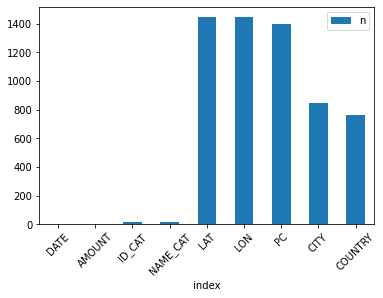

In [22]:
# pinto en un grafico de barras el numero de valores null por columna
statistics_df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [23]:
# veo el porcentaje de valores not null por columna
statistics_df.notnull().sum()/len(statistics_df.index)*100

DATE        100.000000
AMOUNT      100.000000
ID_CAT       98.655010
NAME_CAT     98.655010
LAT           2.824479
LON           2.824479
PC            6.052455
CITY         42.837929
COUNTRY      48.419637
dtype: float64

<AxesSubplot:xlabel='index'>

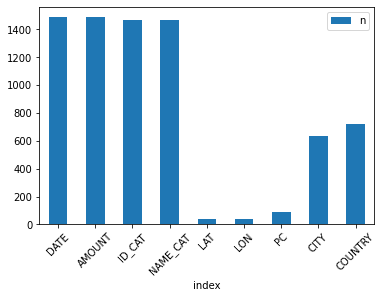

In [24]:
# pinto en un grafico de barras el numero de valores not null por columna
statistics_df.notnull().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [25]:
# examino cuantos valores distintos hay para PC
statistics_df.PC.unique()

array([   nan, 43005., 28028., 43006., 43203., 43007., 43204.,  8908.,
       28108., 28023., 43002.])

In [26]:
# examino cuantos valores distintos hay para COUNTRY
statistics_df.COUNTRY.unique()

array([nan, 'España', 'Global', 'Alcobendas', 'Andorra', 'Madrid'],
      dtype=object)

In [27]:
# cuento la cantidad de observaciones que hay por cada localizacion
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY
COUNTRY,,,,,,,,
Alcobendas,27,27,27,27,0,0,26,1
Andorra,1,1,1,1,0,0,0,1
España,460,460,460,460,10,10,10,451
Global,226,226,226,226,32,32,48,182
Madrid,6,6,6,6,0,0,6,0


In [28]:
"""
TODO: los valores Alcobendas y Madrid hay que sustituirlos por España
"""

'\nTODO: los valores Alcobendas y Madrid hay que sustituirlos por España\n'

In [29]:
# veo la cantidad de valores distintos que hay para ciudad
statistics_df.CITY.unique()

array([nan, '', 'Madrid', 'Tarragona', 'Reus', 'Sevilla',
       "L'Hospitalet de Llobregat", '28108'], dtype=object)

In [30]:
"""
TODO: 28108 hay que sustituirlo por Alcobendas y '' hay que sustituirlo por nan
"""

"\nTODO: 28108 hay que sustituirlo por Alcobendas y '' hay que sustituirlo por nan\n"

In [31]:
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,COUNTRY
CITY,,,,,,,,
,557,557,557,557,0,0,0,555
28108,1,1,1,1,0,0,0,1
L'Hospitalet de Llobregat,1,1,1,1,1,1,1,1
Madrid,17,17,17,17,0,0,16,17
Reus,2,2,2,2,2,2,2,2
Sevilla,31,31,31,31,0,0,0,31
Tarragona,28,28,28,28,28,28,28,28


In [32]:
# En columna COUNTRY Alcobendas escribimos valor en columna CITY
# Luego en columna COUNTRY donde pone Alcobendas ponemos España

In [33]:
statistics_df.loc[statistics_df['COUNTRY'] == 'Alcobendas', 'CITY'] = 'Alcobendas'

In [34]:
statistics_df.loc[statistics_df['COUNTRY'] == 'Alcobendas', 'COUNTRY'] = 'España'

In [35]:
# examino cuantos valores distintos hay para COUNTRY
statistics_df.COUNTRY.unique()

array([nan, 'España', 'Global', 'Andorra', 'Madrid'], dtype=object)

In [36]:
# cuento la cantidad de observaciones que hay por cada localizacion
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY
COUNTRY,,,,,,,,
Andorra,1,1,1,1,0,0,0,1
España,487,487,487,487,10,10,36,478
Global,226,226,226,226,32,32,48,182
Madrid,6,6,6,6,0,0,6,0


In [37]:
# En columna COUNTRY Madrid escribimos valor en columna CITY
# Luego en columna COUNTRY donde pone Madrid ponemos España

In [38]:
statistics_df.loc[statistics_df['COUNTRY'] == 'Madrid', 'CITY'] = 'Madrid'

In [39]:
statistics_df.loc[statistics_df['COUNTRY'] == 'Madrid', 'COUNTRY'] = 'España'

In [40]:
# examino cuantos valores distintos hay para COUNTRY
statistics_df.COUNTRY.unique()

array([nan, 'España', 'Global', 'Andorra'], dtype=object)

In [41]:
# cuento la cantidad de observaciones que hay por cada localizacion
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY
COUNTRY,,,,,,,,
Andorra,1,1,1,1,0,0,0,1
España,493,493,493,493,10,10,42,484
Global,226,226,226,226,32,32,48,182


In [42]:
# hago un drop de las columnas LAT, LON y PC porque no las voy a usar
statistics_df.drop(columns=["LAT", "LON", "PC"], inplace=True)
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
0,2020-07-24,-1.20,84.0,category.parking_84,NaN,NaN
1,2020-07-23,-4.50,117.0,category.regalos_celebraciones_117,NaN,NaN
2,2020-07-23,-13.53,70.0,category.supermercados_70,,España
3,2020-07-22,-51.40,222.0,category.adsl_222,,España
4,2020-07-22,-11.00,70.0,category.supermercados_70,,España
...,...,...,...,...,...,...
1482,2016-09-05,1533.02,18.0,category.retribucion_liquida_18,NaN,NaN
1483,2016-09-05,-617.47,126.0,category.liquidacion_tarjeta_126,NaN,NaN
1484,2016-09-05,-138.08,125.0,category.cuotas_125,NaN,NaN
1485,2016-09-01,-32.22,90.0,category.seguro_salud_90,,España


In [43]:
# En columna CITY sustituimos 28018 por Alcobendas

In [44]:
statistics_df.loc[statistics_df['CITY'] == '28108', 'CITY'] = 'Alcobendas'

In [45]:
# examino cuantos valores distintos hay para CITY
statistics_df.CITY.unique()

array([nan, '', 'Madrid', 'Tarragona', 'Reus', 'Sevilla',
       "L'Hospitalet de Llobregat", 'Alcobendas'], dtype=object)

In [46]:
# en dataframe sustituyo celdas vacias por NaN en columna CITY
statistics_df.loc[statistics_df['CITY'] == '', 'CITY'] = numpy.NaN

In [47]:
# examino cuantos valores distintos hay para CITY
statistics_df.CITY.unique()

array([nan, 'Madrid', 'Tarragona', 'Reus', 'Sevilla',
       "L'Hospitalet de Llobregat", 'Alcobendas'], dtype=object)

In [48]:
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
0,2020-07-24,-1.20,84.0,category.parking_84,NaN,NaN
1,2020-07-23,-4.50,117.0,category.regalos_celebraciones_117,NaN,NaN
2,2020-07-23,-13.53,70.0,category.supermercados_70,NaN,España
3,2020-07-22,-51.40,222.0,category.adsl_222,NaN,España
4,2020-07-22,-11.00,70.0,category.supermercados_70,NaN,España
...,...,...,...,...,...,...
1482,2016-09-05,1533.02,18.0,category.retribucion_liquida_18,NaN,NaN
1483,2016-09-05,-617.47,126.0,category.liquidacion_tarjeta_126,NaN,NaN
1484,2016-09-05,-138.08,125.0,category.cuotas_125,NaN,NaN
1485,2016-09-01,-32.22,90.0,category.seguro_salud_90,NaN,España


In [49]:
# Nos quedamos con las transacciones del año 2019 y 2020

In [50]:
statistics_df = statistics_df[~(statistics_df['DATE'] < '2019-01-01')]
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
0,2020-07-24,-1.20,84.0,category.parking_84,NaN,NaN
1,2020-07-23,-4.50,117.0,category.regalos_celebraciones_117,NaN,NaN
2,2020-07-23,-13.53,70.0,category.supermercados_70,NaN,España
3,2020-07-22,-51.40,222.0,category.adsl_222,NaN,España
4,2020-07-22,-11.00,70.0,category.supermercados_70,NaN,España
...,...,...,...,...,...,...
402,2019-01-02,-801.69,126.0,category.liquidacion_tarjeta_126,NaN,NaN
403,2019-01-02,-72.38,90.0,category.seguro_salud_90,NaN,España
404,2019-01-02,-5.00,90.0,category.seguro_salud_90,NaN,España
405,2019-01-02,-105.00,330.0,category.cuota_330,NaN,España


In [51]:
#veo estadisticas de datos
statistics_df.describe()

,AMOUNT,ID_CAT
count,407.000000,397.000000
mean,-2.286708,184.347607
std,410.835804,158.445845
min,-939.620000,10.000000
25%,-67.660000,71.000000
50%,-20.000000,115.000000
75%,-4.950000,222.000000
max,3456.760000,586.000000


In [52]:
"""
CONCLUSION: no puedo obtener informacion concreta de la localizacion a partir de las estadisticas de AMOUNT 
e ID_CAT
"""

'\nCONCLUSION: no puedo obtener informacion concreta de la localizacion a partir de las estadisticas de AMOUNT \ne ID_CAT\n'

In [53]:
# veo mascara True si el valor de la celda es null
statistics_df.isna()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
0,False,False,False,False,True,True
1,False,False,False,False,True,True
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
402,False,False,False,False,True,True
403,False,False,False,False,True,False
404,False,False,False,False,True,False
405,False,False,False,False,True,False


In [54]:
# veo el total de los valores null por columna
statistics_df.isna().sum()

DATE          0
AMOUNT        0
ID_CAT       10
NAME_CAT     10
CITY        385
COUNTRY     227
dtype: int64

In [55]:
# numero de filas del dataframe
len(statistics_df.index)

407

In [56]:
# veo el porcentaje de valores null por columna
statistics_df.isna().sum()/len(statistics_df.index)*100

DATE         0.000000
AMOUNT       0.000000
ID_CAT       2.457002
NAME_CAT     2.457002
CITY        94.594595
COUNTRY     55.773956
dtype: float64

In [57]:
"""
En el 94% de las filas CITY es null y en el 55% de las filas COUNTRY es null
"""

'\nEn el 94% de las filas CITY es null y en el 55% de las filas COUNTRY es null\n'

<AxesSubplot:xlabel='index'>

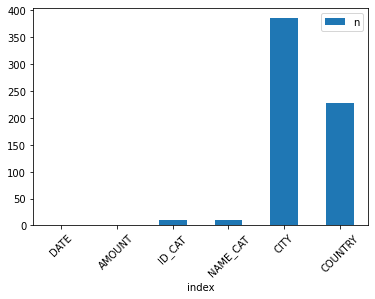

In [58]:
# pinto en un grafico de barras el numero de valores null por columna
statistics_df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [59]:
# veo el porcentaje de valores not null por columna
statistics_df.notnull().sum()/len(statistics_df.index)*100

DATE        100.000000
AMOUNT      100.000000
ID_CAT       97.542998
NAME_CAT     97.542998
CITY          5.405405
COUNTRY      44.226044
dtype: float64

In [60]:
"""
Solo  en el 5.4% de las transacciones CITY es not null.
En el 44% de las transacciones COUNTRY es not null.
"""

'\nSolo  en el 5.4% de las transacciones CITY es not null.\nEn el 44% de las transacciones COUNTRY es not null.\n'

<AxesSubplot:xlabel='index'>

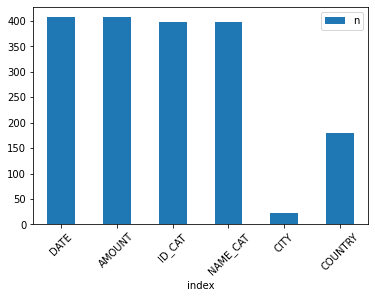

In [61]:
# pinto en un grafico de barras el numero de valores not null por columna
statistics_df.notnull().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [62]:
# examino cuantos valores distintos hay para COUNTRY
statistics_df.COUNTRY.unique()

array([nan, 'España', 'Global'], dtype=object)

In [63]:
# cuento la cantidad de observaciones que hay por COUNTRY
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY
COUNTRY,,,,,
España,110,110,110,110,6
Global,70,70,70,70,16


In [64]:
# examino cuantos valores distintos hay para CITY
statistics_df.CITY.unique()

array([nan, 'Madrid', 'Tarragona', 'Reus', 'Sevilla'], dtype=object)

In [65]:
# cuento la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY
CITY,,,,,
Madrid,14,14,14,14,14
Reus,2,2,2,2,2
Sevilla,3,3,3,3,3
Tarragona,3,3,3,3,3


In [66]:
# Voy a eliminar las transacciones donde ID_CAT y NAME_CAT sean null porque de acuerdo a las estadisticas
# tampoco tienen ni CITY ni COUNTRY

In [67]:
len(statistics_df)

407

In [68]:
# me quedo con las filas donde ID_CAT es not null
statistics_df = statistics_df[statistics_df['ID_CAT'].notna()]

In [69]:
len(statistics_df)

397

In [70]:
# me quedo con las filas donde NAME_CAT es not null
statistics_df = statistics_df[statistics_df['NAME_CAT'].notna()]

In [71]:
len(statistics_df)

397

In [72]:
"""
Por la cantidad de columnas antes y despues de las operaciones anteriores concluimos que cuando ID_CAT era null
entonces NAME_CAT también lo era
"""

'\nPor la cantidad de columnas antes y despues de las operaciones anteriores concluimos que cuando ID_CAT era null\nentonces NAME_CAT también lo era\n'

In [73]:
# veo mascara True si el valor de la celda es null
statistics_df.isna()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
0,False,False,False,False,True,True
1,False,False,False,False,True,True
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
402,False,False,False,False,True,True
403,False,False,False,False,True,False
404,False,False,False,False,True,False
405,False,False,False,False,True,False


In [74]:
# veo el total de los valores null por columna
statistics_df.isna().sum()

DATE          0
AMOUNT        0
ID_CAT        0
NAME_CAT      0
CITY        375
COUNTRY     217
dtype: int64

In [75]:
# numero de filas del dataframe
len(statistics_df.index)

397

In [76]:
# veo el porcentaje de valores null por columna
statistics_df.isna().sum()/len(statistics_df.index)*100

DATE         0.000000
AMOUNT       0.000000
ID_CAT       0.000000
NAME_CAT     0.000000
CITY        94.458438
COUNTRY     54.659950
dtype: float64

In [77]:
"""
El 94% de los valores de CITY son null.     --> 397 - 375 = 22 filas de 397 son not null
El 55% de los valores de COUNTRY son null.  --> 397 - 217 = 180 filas de 397 son not null
"""

'\nEl 94% de los valores de CITY son null.     --> 397 - 375 = 22 filas de 397 son not null\nEl 55% de los valores de COUNTRY son null.  --> 397 - 217 = 180 filas de 397 son not null\n'

<AxesSubplot:xlabel='index'>

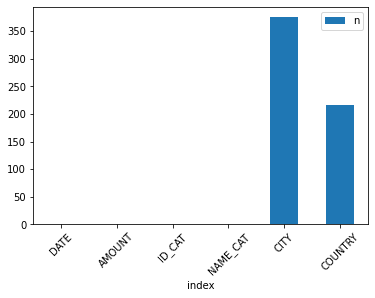

In [78]:
# pinto en un grafico de barras el numero de valores null por columna
statistics_df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [79]:
# veo el porcentaje de valores not null por columna
statistics_df.notnull().sum()/len(statistics_df.index)*100

DATE        100.000000
AMOUNT      100.000000
ID_CAT      100.000000
NAME_CAT    100.000000
CITY          5.541562
COUNTRY      45.340050
dtype: float64

In [80]:
"""
El 05% de los valores de CITY son not null.     --> 397 - 375 = 22 filas de 397 son not null para CITY
El 45% de los valores de COUNTRY son not null.  --> 397 - 217 = 180 filas de 397 son not null para COUNTRY
"""

'\nEl 05% de los valores de CITY son not null.     --> 397 - 375 = 22 filas de 397 son not null para CITY\nEl 45% de los valores de COUNTRY son not null.  --> 397 - 217 = 180 filas de 397 son not null para COUNTRY\n'

<AxesSubplot:xlabel='index'>

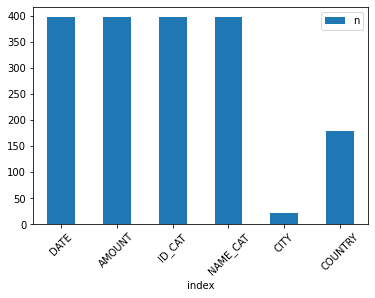

In [81]:
# pinto en un grafico de barras el numero de valores not null por columna
statistics_df.notnull().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [82]:
# examino cuantos valores distintos hay para COUNTRY
statistics_df.COUNTRY.unique()

array([nan, 'España', 'Global'], dtype=object)

In [83]:
# cuento la cantidad de observaciones que hay por COUNTRY
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY
COUNTRY,,,,,
España,110,110,110,110,6
Global,70,70,70,70,16


In [84]:
"""
Hay 180 valores donde COUNTRY es not null y 397 - 180 = 217 observaciones donde es null
"""

'\nHay 180 valores donde COUNTRY es not null y 397 - 180 = 217 observaciones donde es null\n'

In [85]:
# examino cuantos valores distintos hay para CITY
statistics_df.CITY.unique()

array([nan, 'Madrid', 'Tarragona', 'Reus', 'Sevilla'], dtype=object)

In [86]:
# cuento la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY
CITY,,,,,
Madrid,14,14,14,14,14
Reus,2,2,2,2,2
Sevilla,3,3,3,3,3
Tarragona,3,3,3,3,3


In [87]:
"""
Hay 22 valores donde CITY es not null y 397 - 22 = 375 observaciones donde es null
"""

'\nHay 22 valores donde CITY es not null y 397 - 22 = 375 observaciones donde es null\n'

In [88]:
# vamos a ver las filas que tienen CITY not null para ver que COUNTRY tienen

In [89]:
statistics_df[statistics_df['CITY'].notnull()]

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
29,2020-07-07,-31.00,111.0,category.transporte_publico_111,Madrid,España
52,2020-06-22,-0.22,219.0,category.gas_natural_219,Madrid,Global
55,2020-06-18,15.62,18.0,category.retribucion_liquida_18,Madrid,Global
63,2020-06-15,-8.18,219.0,category.gas_natural_219,Madrid,Global
100,2020-05-25,-80.04,219.0,category.gas_natural_219,Madrid,Global
152,2019-11-25,-87.45,219.0,category.gas_natural_219,Madrid,Global
167,2019-10-24,-87.45,219.0,category.gas_natural_219,Madrid,Global
188,2019-09-26,-87.45,219.0,category.gas_natural_219,Madrid,Global
195,2019-09-19,-51.12,70.0,category.supermercados_70,Tarragona,Global
203,2019-06-25,-87.31,219.0,category.gas_natural_219,Madrid,Global


In [90]:
"""
CONCLUSION: todas las CITY tienen COUNTRY y es España
"""

'\nCONCLUSION: todas las CITY tienen COUNTRY y es España\n'

In [91]:
# Vamos a ver las filas donde COUNTRY es global

In [92]:
pandas.set_option('display.max_rows', None)

In [93]:
statistics_df.loc[statistics_df['COUNTRY'] == 'Global']

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
6,2020-07-22,-73.77,70.0,category.supermercados_70,NaN,Global
8,2020-07-20,-38.48,71.0,category.bazares_71,NaN,Global
12,2020-07-20,-14.75,70.0,category.supermercados_70,NaN,Global
17,2020-07-14,-11.94,71.0,category.bazares_71,NaN,Global
23,2020-07-13,6.49,113.0,Otros gastos personales,NaN,Global
32,2020-07-07,-47.17,113.0,Otros gastos personales,NaN,Global
37,2020-07-06,-117.83,109.0,category.ropa_complementos_109,NaN,Global
38,2020-07-06,-10.99,109.0,category.ropa_complementos_109,NaN,Global
39,2020-07-06,-41.37,109.0,category.ropa_complementos_109,NaN,Global
52,2020-06-22,-0.22,219.0,category.gas_natural_219,Madrid,Global


In [94]:
pandas.set_option('display.max_rows', 20)

In [95]:
# Vamos a asignar a COUNTRY el valor de ESPAÑA donde CITY sea not null
statistics_df.loc[statistics_df['CITY'].notnull(), 'COUNTRY'] = 'España'

In [96]:
pandas.set_option('display.max_rows', None)

In [97]:
statistics_df[statistics_df['CITY'].notnull()]

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
29,2020-07-07,-31.00,111.0,category.transporte_publico_111,Madrid,España
52,2020-06-22,-0.22,219.0,category.gas_natural_219,Madrid,España
55,2020-06-18,15.62,18.0,category.retribucion_liquida_18,Madrid,España
63,2020-06-15,-8.18,219.0,category.gas_natural_219,Madrid,España
100,2020-05-25,-80.04,219.0,category.gas_natural_219,Madrid,España
152,2019-11-25,-87.45,219.0,category.gas_natural_219,Madrid,España
167,2019-10-24,-87.45,219.0,category.gas_natural_219,Madrid,España
188,2019-09-26,-87.45,219.0,category.gas_natural_219,Madrid,España
195,2019-09-19,-51.12,70.0,category.supermercados_70,Tarragona,España
203,2019-06-25,-87.31,219.0,category.gas_natural_219,Madrid,España


In [98]:
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
0,2020-07-24,-1.20,84.0,category.parking_84,NaN,NaN
1,2020-07-23,-4.50,117.0,category.regalos_celebraciones_117,NaN,NaN
2,2020-07-23,-13.53,70.0,category.supermercados_70,NaN,España
3,2020-07-22,-51.40,222.0,category.adsl_222,NaN,España
4,2020-07-22,-11.00,70.0,category.supermercados_70,NaN,España
6,2020-07-22,-73.77,70.0,category.supermercados_70,NaN,Global
7,2020-07-21,-10.95,110.0,category.belleza_estetica_110,NaN,NaN
8,2020-07-20,-38.48,71.0,category.bazares_71,NaN,Global
9,2020-07-20,-16.17,70.0,category.supermercados_70,NaN,España
10,2020-07-20,-44.60,116.0,category.restaurantes_salidas_116,NaN,NaN


In [99]:
# voy a eliminar las filas donde CITY y COUNTRY sono Nan simultaneamente

In [100]:
len(statistics_df)

397

In [101]:
index_names = statistics_df[statistics_df['CITY'].isnull() & statistics_df['COUNTRY'].isnull()].index
index_names

Int64Index([  0,   1,   7,  10,  14,  16,  18,  19,  20,  21,
            ...
            385, 386, 388, 390, 391, 392, 396, 399, 400, 402],
           dtype='int64', length=217)

In [102]:
len(index_names)

217

In [103]:
"""
Hay 217 filas sin localizacion ni en CITY ni en COUNTRY de las 397 filas que habia en total.

Voy a eliminar 217/397 = el 54.66% de las filas 

Y me voy a quedar con 180 filas
"""

'\nHay 217 filas sin localizacion ni en CITY ni en COUNTRY de las 397 filas que habia en total.\n\nVoy a eliminar 217/397 = el 54.66% de las filas \n\nY me voy a quedar con 180 filas\n'

In [104]:
statistics_df.drop(index_names, inplace = True)
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
2,2020-07-23,-13.53,70.0,category.supermercados_70,NaN,España
3,2020-07-22,-51.40,222.0,category.adsl_222,NaN,España
4,2020-07-22,-11.00,70.0,category.supermercados_70,NaN,España
6,2020-07-22,-73.77,70.0,category.supermercados_70,NaN,Global
8,2020-07-20,-38.48,71.0,category.bazares_71,NaN,Global
9,2020-07-20,-16.17,70.0,category.supermercados_70,NaN,España
11,2020-07-20,-485.96,50.0,category.mobiliario_decoracion_50,NaN,España
12,2020-07-20,-14.75,70.0,category.supermercados_70,NaN,Global
13,2020-07-17,-12.72,70.0,category.supermercados_70,NaN,España
15,2020-07-15,-6.61,70.0,category.supermercados_70,NaN,España


In [105]:
len(statistics_df)

180

In [106]:
# examino cuantos valores distintos hay para COUNTRY
statistics_df.COUNTRY.unique()

array(['España', 'Global'], dtype=object)

In [107]:
# cuento la cantidad de observaciones que hay por COUNTRY
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY
COUNTRY,,,,,
España,126,126,126,126,22
Global,54,54,54,54,0


In [108]:
"""
Vemos que la localizacion se divide el los siguientes dos porcentajes:
España: 70%
Global: 30%

Y de las localizaciones de España vamos a ver en cuantas de ellas hay CITY
22/126*100 = 17.45 %
"""

'\nVemos que la localizacion se divide el los siguientes dos porcentajes:\nEspaña: 70%\nGlobal: 30%\n\nY de las localizaciones de España vamos a ver en cuantas de ellas hay CITY\n22/126*100 = 17.45 %\n'

In [109]:
# examino cuantos valores distintos hay para CITY
statistics_df.CITY.unique()

array([nan, 'Madrid', 'Tarragona', 'Reus', 'Sevilla'], dtype=object)

In [110]:
# cuento la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY
CITY,,,,,
Madrid,14,14,14,14,14
Reus,2,2,2,2,2
Sevilla,3,3,3,3,3
Tarragona,3,3,3,3,3


In [111]:
"""
Y recordemos que el 100% de las observaciones donde CITY es notnull el COUNTRY es España
"""

'\nY recordemos que el 100% de las observaciones donde CITY es notnull el COUNTRY es España\n'

In [112]:
# veo el total de los valores null por columna
statistics_df.isna().sum()

DATE          0
AMOUNT        0
ID_CAT        0
NAME_CAT      0
CITY        158
COUNTRY       0
dtype: int64

In [113]:
# veo el porcentaje de valores null por columna
statistics_df.isna().sum()/len(statistics_df.index)*100

DATE         0.000000
AMOUNT       0.000000
ID_CAT       0.000000
NAME_CAT     0.000000
CITY        87.777778
COUNTRY      0.000000
dtype: float64

<AxesSubplot:xlabel='index'>

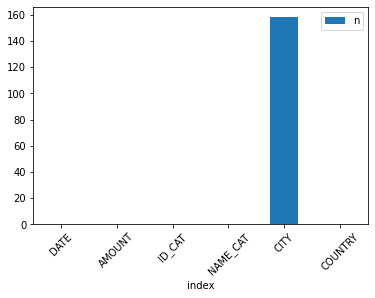

In [114]:
# pinto en un grafico de barras el numero de valores not null por columna
statistics_df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [115]:
# veo el porcentaje de valores not null por columna
statistics_df.notnull().sum()

DATE        180
AMOUNT      180
ID_CAT      180
NAME_CAT    180
CITY         22
COUNTRY     180
dtype: int64

In [116]:
# veo el porcentaje de valores not null por columna
statistics_df.notnull().sum()/len(statistics_df.index)*100

DATE        100.000000
AMOUNT      100.000000
ID_CAT      100.000000
NAME_CAT    100.000000
CITY         12.222222
COUNTRY     100.000000
dtype: float64

<AxesSubplot:xlabel='index'>

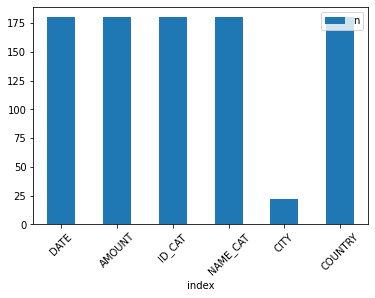

In [117]:
# pinto en un grafico de barras el numero de valores not null por columna
statistics_df.notnull().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [118]:
# muestro la cantidad de observaciones por NAME_CAT
statistics_df.groupby('NAME_CAT').count().sort_values('AMOUNT', ascending=False)

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY
NAME_CAT,,,,,
category.supermercados_70,59,59,59,2,59
Otros gastos personales,23,23,23,0,23
category.adsl_222,13,13,13,0,13
category.cuota_330,13,13,13,0,13
category.gas_natural_219,12,12,12,12,12
category.cuota_prestamo_vehiculo_76,10,10,10,0,10
category.seguro_salud_90,9,9,9,0,9
category.regalos_celebraciones_117,7,7,7,0,7
category.ropa_complementos_109,5,5,5,0,5


In [119]:
# vemos que en las 6 1as categorias que más observaciones acumulan hay 130 observaciones
# 130/180 = 72.22% de las observaciones

In [120]:
# me hago un dataframe para mostrarlo en un grafico de barras
barchar = statistics_df.groupby('NAME_CAT').count().sort_values('AMOUNT', ascending=False)
barchar

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY
NAME_CAT,,,,,
category.supermercados_70,59,59,59,2,59
Otros gastos personales,23,23,23,0,23
category.adsl_222,13,13,13,0,13
category.cuota_330,13,13,13,0,13
category.gas_natural_219,12,12,12,12,12
category.cuota_prestamo_vehiculo_76,10,10,10,0,10
category.seguro_salud_90,9,9,9,0,9
category.regalos_celebraciones_117,7,7,7,0,7
category.ropa_complementos_109,5,5,5,0,5


<AxesSubplot:xlabel='NAME_CAT'>

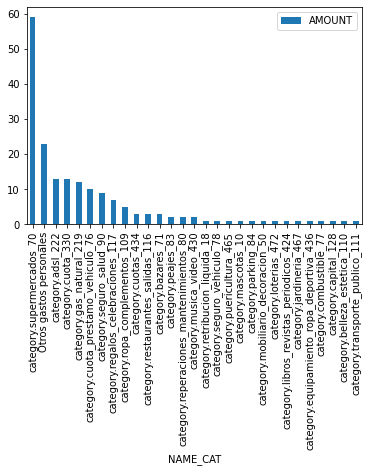

In [121]:
barchar.plot.bar(y='AMOUNT', rot=90)

In [122]:
"""
Vamos a mostrar lo cantidad de movimientos que hay clasificados descendentemente por NAME_CAT 
para COUNTRY=='España'
"""

"\nVamos a mostrar lo cantidad de movimientos que hay clasificados descendentemente por NAME_CAT \npara COUNTRY=='España'\n"

In [123]:
statistics_df.loc[statistics_df['COUNTRY'] == 'España'].groupby('NAME_CAT').count().\
sort_values('AMOUNT', ascending=False)

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY
NAME_CAT,,,,,
category.supermercados_70,49,49,49,2,49
category.adsl_222,13,13,13,0,13
category.cuota_330,13,13,13,0,13
category.gas_natural_219,12,12,12,12,12
category.cuota_prestamo_vehiculo_76,10,10,10,0,10
category.seguro_salud_90,9,9,9,0,9
category.cuotas_434,3,3,3,3,3
category.peajes_83,2,2,2,0,2
category.regalos_celebraciones_117,2,2,2,0,2


In [124]:
barchar = statistics_df.loc[statistics_df['COUNTRY'] == 'España'].groupby('NAME_CAT').count().\
sort_values('AMOUNT', ascending=False)

<AxesSubplot:xlabel='NAME_CAT'>

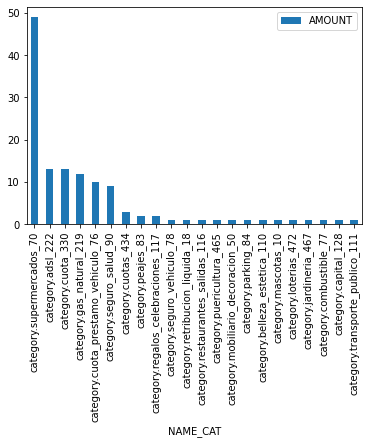

In [125]:
barchar.plot.bar(y='AMOUNT', rot=90)

In [126]:
statistics_df.loc[statistics_df['COUNTRY'] == 'España'].count()

DATE        126
AMOUNT      126
ID_CAT      126
NAME_CAT    126
CITY         22
COUNTRY     126
dtype: int64

In [127]:
"""
Vemos que de las 126 transacciones con COUNTRY = 'España' las 8 primeras NAME_CAT que todas tienen 2 transacciones
suman 111 transacciones o el 111/126*100 = 88% de las transacciones y son las siguientes categorías:

category.supermercados_70
category.adsl_222
category.cuota_330
category.gas_natural_219
category.cuota_prestamo_vehiculo_76
category.seguro_salud_90
category.cuotas_434
category.peajes_83

Vemos que todas estas categorías pueden corresponder a gastos catalogados como del 'HOGAR' o 'CUOTAS Y RECIBOS'
con lo que podemos concluir que COUNTRY = 'España' es el domicilio habitual del usuario
"""

"\nVemos que de las 126 transacciones con COUNTRY = 'España' las 8 primeras NAME_CAT que todas tienen 2 transacciones\nsuman 111 transacciones o el 111/126*100 = 88% de las transacciones y son las siguientes categorías:\n\ncategory.supermercados_70\ncategory.adsl_222\ncategory.cuota_330\ncategory.gas_natural_219\ncategory.cuota_prestamo_vehiculo_76\ncategory.seguro_salud_90\ncategory.cuotas_434\ncategory.peajes_83\n\nVemos que todas estas categorías pueden corresponder a gastos catalogados como del 'HOGAR' o 'CUOTAS Y RECIBOS'\ncon lo que podemos concluir que COUNTRY = 'España' es el domicilio habitual del usuario\n"

In [128]:
"""
Vamos a mostrar lo cantidad de movimientos que hay clasificados descendientemente por NAME_CAT 
para COUNTRY=='Global'
"""

"\nVamos a mostrar lo cantidad de movimientos que hay clasificados descendientemente por NAME_CAT \npara COUNTRY=='Global'\n"

In [129]:
statistics_df.loc[statistics_df['COUNTRY'] == 'Global'].groupby('NAME_CAT').count().\
sort_values('AMOUNT', ascending=False)

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY
NAME_CAT,,,,,
Otros gastos personales,23,23,23,0,23
category.supermercados_70,10,10,10,0,10
category.regalos_celebraciones_117,5,5,5,0,5
category.ropa_complementos_109,5,5,5,0,5
category.bazares_71,3,3,3,0,3
category.musica_video_430,2,2,2,0,2
category.reperaciones_mantenimientos_80,2,2,2,0,2
category.restaurantes_salidas_116,2,2,2,0,2
category.equipamiento_ropa_deportiva_436,1,1,1,0,1


<AxesSubplot:xlabel='NAME_CAT'>

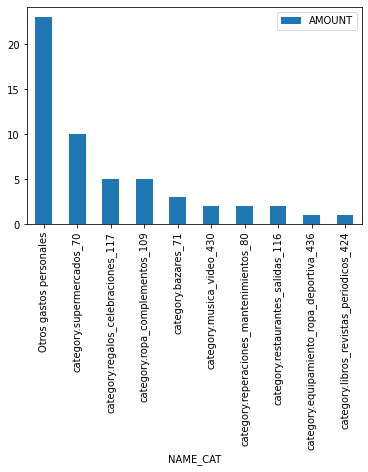

In [130]:
barchar = statistics_df.loc[statistics_df['COUNTRY'] == 'Global'].groupby('NAME_CAT').count().\
sort_values('AMOUNT', ascending=False)
barchar.plot.bar(y='AMOUNT', rot=90)

In [131]:
statistics_df.loc[statistics_df['COUNTRY'] == 'Global'].count()

DATE        54
AMOUNT      54
ID_CAT      54
NAME_CAT    54
CITY         0
COUNTRY     54
dtype: int64

In [132]:
"""
Vemos que las 5 1as categorias son aquellas que en las que una persona se puede gastar dinero cuando esta de viaje.
Y estas 5 categorias suman 46 transacciones o 46/54*100 = 85% de las transacciones de COUNTRY='Global'

Otros gastos personales	23
category.supermercados_70
category.regalos_celebraciones_117
category.ropa_complementos_109
category.bazares_71

CONCLUSION: los movimientos asociados a COUNTRY='Global' se pueden asumir que son realizados cuando el usuario
esta de viaje.
"""

"\nVemos que las 5 1as categorias son aquellas que en las que una persona se puede gastar dinero cuando esta de viaje.\nY estas 5 categorias suman 46 transacciones o 46/54*100 = 85% de las transacciones de COUNTRY='Global'\n\nOtros gastos personales\t23\ncategory.supermercados_70\ncategory.regalos_celebraciones_117\ncategory.ropa_complementos_109\ncategory.bazares_71\n\nCONCLUSION: los movimientos asociados a COUNTRY='Global' se pueden asumir que son realizados cuando el usuario\nesta de viaje.\n"

In [133]:
"""
Todos los movimientos con CITY != np.NaN tienen COUNTRY = 'España'.
Vamos a verlos agrupados a ver cuantos son y que categorías tienen.
"""

"\nTodos los movimientos con CITY != np.NaN tienen COUNTRY = 'España'.\nVamos a verlos agrupados a ver cuantos son y que categorías tienen.\n"

In [134]:
statistics_df.loc[statistics_df['COUNTRY'] == 'España'].groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY
CITY,,,,,
Madrid,14,14,14,14,14
Reus,2,2,2,2,2
Sevilla,3,3,3,3,3
Tarragona,3,3,3,3,3


In [135]:
statistics_df.loc[statistics_df['COUNTRY'] == 'España'].groupby(['CITY','NAME_CAT']).count()

DATE  AMOUNT  ID_CAT  COUNTRY
CITY      NAME_CAT                                                      
Madrid    category.gas_natural_219           12      12      12       12
          category.retribucion_liquida_18     1       1       1        1
          category.transporte_publico_111     1       1       1        1
Reus      category.combustible_77             1       1       1        1
          category.parking_84                 1       1       1        1
Sevilla   category.cuotas_434                 3       3       3        3
Tarragona category.mascotas_10                1       1       1        1
          category.supermercados_70           2       2       2        2

In [136]:
"""
Vemos que los movimientos asociados a Reus son los unicos que tienen NAME_CAT que se pueden asociar a un viaje 
pero unicamente son 2 transacciones (combustible y parking) así que no los podemos considerar representativos de
los patrones de viaje de un usuario.
"""

'\nVemos que los movimientos asociados a Reus son los unicos que tienen NAME_CAT que se pueden asociar a un viaje \npero unicamente son 2 transacciones (combustible y parking) así que no los podemos considerar representativos de\nlos patrones de viaje de un usuario.\n'

In [137]:
# Vamos a agrupar las transacciones por COUNTRY a ver la cantidad y porcentaje que tienen por cada tipo de valor

In [138]:
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY
COUNTRY,,,,,
España,126,126,126,126,22
Global,54,54,54,54,0


In [139]:
"""
Vemos que 126/(126 + 54)*100 = 70% de las transaccion son 'España' y 30% 'Global'
"""

"\nVemos que 126/(126 + 54)*100 = 70% de las transaccion son 'España' y 30% 'Global'\n"

In [140]:
# pintamos los resultados anteriores en un grafico de barras

<AxesSubplot:xlabel='COUNTRY'>

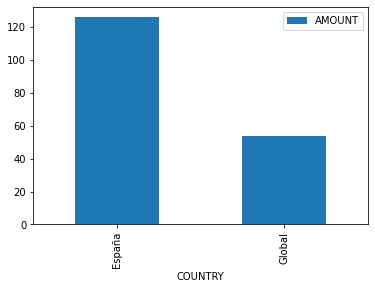

In [141]:
barchar = statistics_df.groupby('COUNTRY').count().\
sort_values('AMOUNT', ascending=False)
barchar.plot.bar(y='AMOUNT', rot=90)

In [142]:
"""
CONCLUSION: puede ser razonable pensar que el 70% de las transacciones están localizadas en el domicilio habitual
del usuario y el 30% de ellas cuando está fuera o de viaje
"""

'\nCONCLUSION: puede ser razonable pensar que el 70% de las transacciones están localizadas en el domicilio habitual\ndel usuario y el 30% de ellas cuando está fuera o de viaje\n'

In [143]:
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
2,2020-07-23,-13.53,70.0,category.supermercados_70,NaN,España
3,2020-07-22,-51.40,222.0,category.adsl_222,NaN,España
4,2020-07-22,-11.00,70.0,category.supermercados_70,NaN,España
6,2020-07-22,-73.77,70.0,category.supermercados_70,NaN,Global
8,2020-07-20,-38.48,71.0,category.bazares_71,NaN,Global
9,2020-07-20,-16.17,70.0,category.supermercados_70,NaN,España
11,2020-07-20,-485.96,50.0,category.mobiliario_decoracion_50,NaN,España
12,2020-07-20,-14.75,70.0,category.supermercados_70,NaN,Global
13,2020-07-17,-12.72,70.0,category.supermercados_70,NaN,España
15,2020-07-15,-6.61,70.0,category.supermercados_70,NaN,España


In [144]:
"""
Vamos a representar la serie temporal de las transacciones de siguiente manera:

1-A la localización de España la asignamos el valor de '1.0'
2-A la localización de Global la asignamos el valor de '0.1'
3-Agrupamos y sumamos las transacciones por fechas y
3.1- si el valor es entero es 'España' y le asignamos el valor de '100'
3.2- si el valor es decimal es 'Global' o 'Viaje' y le asignamos el valor de '200'
4-Rellenamos los dias que no tengan transaccion con '0'
5-Pintamos la serie temporal y vemos si tiene estacionalidad y los viajes coinciden con 'vacaciones' o 'fiestas'
6-Hacemos otra serie rellenado los dias que no tengan transaccion con el ultimo valor valido anterior
7-Pintamos la OTRA serie temporal y vemos si tiene estacionalidad y los viajes coinciden con 'vacaciones' o 
'fiestas'
"""

"\nVamos a representar la serie temporal de las transacciones de siguiente manera:\n\n1-A la localización de España la asignamos el valor de '1.0'\n2-A la localización de Global la asignamos el valor de '0.1'\n3-Agrupamos y sumamos las transacciones por fechas y\n3.1- si el valor es entero es 'España' y le asignamos el valor de '100'\n3.2- si el valor es decimal es 'Global' o 'Viaje' y le asignamos el valor de '200'\n4-Rellenamos los dias que no tengan transaccion con '0'\n5-Pintamos la serie temporal y vemos si tiene estacionalidad y los viajes coinciden con 'vacaciones' o 'fiestas'\n6-Hacemos otra serie rellenado los dias que no tengan transaccion con el ultimo valor valido anterior\n7-Pintamos la OTRA serie temporal y vemos si tiene estacionalidad y los viajes coinciden con 'vacaciones' o \n'fiestas'\n"

In [145]:
geolocal_df = statistics_df.copy(deep=True)
geolocal_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
2,2020-07-23,-13.53,70.0,category.supermercados_70,NaN,España
3,2020-07-22,-51.40,222.0,category.adsl_222,NaN,España
4,2020-07-22,-11.00,70.0,category.supermercados_70,NaN,España
6,2020-07-22,-73.77,70.0,category.supermercados_70,NaN,Global
8,2020-07-20,-38.48,71.0,category.bazares_71,NaN,Global
9,2020-07-20,-16.17,70.0,category.supermercados_70,NaN,España
11,2020-07-20,-485.96,50.0,category.mobiliario_decoracion_50,NaN,España
12,2020-07-20,-14.75,70.0,category.supermercados_70,NaN,Global
13,2020-07-17,-12.72,70.0,category.supermercados_70,NaN,España
15,2020-07-15,-6.61,70.0,category.supermercados_70,NaN,España


In [146]:
geolocal_df.drop(columns=['ID_CAT','NAME_CAT','CITY'], inplace=True)
geolocal_df

,DATE,AMOUNT,COUNTRY
2,2020-07-23,-13.53,España
3,2020-07-22,-51.40,España
4,2020-07-22,-11.00,España
6,2020-07-22,-73.77,Global
8,2020-07-20,-38.48,Global
9,2020-07-20,-16.17,España
11,2020-07-20,-485.96,España
12,2020-07-20,-14.75,Global
13,2020-07-17,-12.72,España
15,2020-07-15,-6.61,España


In [147]:
# añadimos una columna para la localizacion
geolocal_df['GEOLOC'] = 0.0
geolocal_df

,DATE,AMOUNT,COUNTRY,GEOLOC
2,2020-07-23,-13.53,España,0.0
3,2020-07-22,-51.40,España,0.0
4,2020-07-22,-11.00,España,0.0
6,2020-07-22,-73.77,Global,0.0
8,2020-07-20,-38.48,Global,0.0
9,2020-07-20,-16.17,España,0.0
11,2020-07-20,-485.96,España,0.0
12,2020-07-20,-14.75,Global,0.0
13,2020-07-17,-12.72,España,0.0
15,2020-07-15,-6.61,España,0.0


In [148]:
geolocal_df.dtypes

DATE       datetime64[ns]
AMOUNT            float64
COUNTRY            object
GEOLOC            float64
dtype: object

In [149]:
# a la localización de España la asignamos el valor de 1.0 en GEOLOC
geolocal_df.loc[geolocal_df.COUNTRY == "España", "GEOLOC"] = 1.0
geolocal_df

,DATE,AMOUNT,COUNTRY,GEOLOC
2,2020-07-23,-13.53,España,1.0
3,2020-07-22,-51.40,España,1.0
4,2020-07-22,-11.00,España,1.0
6,2020-07-22,-73.77,Global,0.0
8,2020-07-20,-38.48,Global,0.0
9,2020-07-20,-16.17,España,1.0
11,2020-07-20,-485.96,España,1.0
12,2020-07-20,-14.75,Global,0.0
13,2020-07-17,-12.72,España,1.0
15,2020-07-15,-6.61,España,1.0


In [150]:
# a la localización de 'Global' la asignamos el valor de 0.1 en GEOLOC
geolocal_df.loc[geolocal_df.COUNTRY == "Global", "GEOLOC"] = 0.1
geolocal_df

,DATE,AMOUNT,COUNTRY,GEOLOC
2,2020-07-23,-13.53,España,1.0
3,2020-07-22,-51.40,España,1.0
4,2020-07-22,-11.00,España,1.0
6,2020-07-22,-73.77,Global,0.1
8,2020-07-20,-38.48,Global,0.1
9,2020-07-20,-16.17,España,1.0
11,2020-07-20,-485.96,España,1.0
12,2020-07-20,-14.75,Global,0.1
13,2020-07-17,-12.72,España,1.0
15,2020-07-15,-6.61,España,1.0


In [151]:
# hacemos un drop de COUNTRY
geolocal_df.drop(columns=['COUNTRY'], inplace=True)
geolocal_df

,DATE,AMOUNT,GEOLOC
2,2020-07-23,-13.53,1.0
3,2020-07-22,-51.40,1.0
4,2020-07-22,-11.00,1.0
6,2020-07-22,-73.77,0.1
8,2020-07-20,-38.48,0.1
9,2020-07-20,-16.17,1.0
11,2020-07-20,-485.96,1.0
12,2020-07-20,-14.75,0.1
13,2020-07-17,-12.72,1.0
15,2020-07-15,-6.61,1.0


In [152]:
geolocal_df.dtypes

DATE      datetime64[ns]
AMOUNT           float64
GEOLOC           float64
dtype: object

In [153]:
# ordenamos las fechas por orden ascendente
geolocal_df.sort_values(by=['DATE'], ascending=True, inplace=True, ignore_index=True)
geolocal_df

,DATE,AMOUNT,GEOLOC
0,2019-01-02,-122.40,1.0
1,2019-01-02,-37.07,1.0
2,2019-01-02,-105.00,1.0
3,2019-01-02,-5.00,1.0
4,2019-01-02,-72.38,1.0
5,2019-01-03,-30.89,0.1
6,2019-01-03,-25.04,1.0
7,2019-01-03,-31.91,1.0
8,2019-01-03,-36.05,0.1
9,2019-01-03,-18.11,1.0


In [154]:
# vamos a agrupar los valores y sumarlos por fecha
geolocal_df = geolocal_df.groupby(['DATE']).sum()
geolocal_df

,AMOUNT,GEOLOC
DATE,,
2019-01-02,-341.85,5.0
2019-01-03,-142.00,3.2
2019-01-07,-42.19,2.1
2019-01-22,-96.04,1.0
2019-01-28,-362.76,1.0
2019-02-01,-215.57,3.0
2019-02-04,-42.69,0.1
2019-02-05,-141.00,1.1
2019-02-06,-41.27,0.1


In [155]:
# comprobamos que el indice sea datetime o DatetimeIndex
type(geolocal_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [156]:
pandas.set_option('display.max_rows', 10)

In [157]:
# hacemos una columna con la fecha del indice
geolocal_df['DATE'] = geolocal_df.index
geolocal_df

,AMOUNT,GEOLOC,DATE
DATE,,,
2019-01-02,-341.85,5.0,2019-01-02
2019-01-03,-142.00,3.2,2019-01-03
2019-01-07,-42.19,2.1,2019-01-07
2019-01-22,-96.04,1.0,2019-01-22
2019-01-28,-362.76,1.0,2019-01-28
...,...,...,...
2020-07-15,-6.61,1.0,2020-07-15
2020-07-17,-12.72,1.0,2020-07-17
2020-07-20,-555.36,2.2,2020-07-20


In [158]:
# me creo un indice con todas las fechas entre las DATE mínima y máxima de geolocal_df
idx = date_range(start=geolocal_df.DATE.min(), end=geolocal_df.DATE.max())
idx

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23'],
              dtype='datetime64[ns]', length=569, freq='D')

In [159]:
# colocamos la columna DATE como indice (tb podiamos haber hecho un drop)
geolocal_df.set_index('DATE', inplace=True)
geolocal_df

,AMOUNT,GEOLOC
DATE,,
2019-01-02,-341.85,5.0
2019-01-03,-142.00,3.2
2019-01-07,-42.19,2.1
2019-01-22,-96.04,1.0
2019-01-28,-362.76,1.0
...,...,...
2020-07-15,-6.61,1.0
2020-07-17,-12.72,1.0
2020-07-20,-555.36,2.2


In [160]:
idx = date_range(start=geolocal_df.index.min(), end=geolocal_df.index.max())
idx

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23'],
              dtype='datetime64[ns]', length=569, freq='D')

In [161]:
# METODO 2
# rellenamos las missing dates en el indice con el ultimo valor valido anterior
geolocal_filled_df = geolocal_df.reindex(idx, fill_value='NaN')
geolocal_filled_df

,AMOUNT,GEOLOC
2019-01-02,-341.85,5.0
2019-01-03,-142.0,3.2
2019-01-04,NaN,NaN
2019-01-05,NaN,NaN
2019-01-06,NaN,NaN
...,...,...
2020-07-19,NaN,NaN
2020-07-20,-555.36,2.2
2020-07-21,NaN,NaN
2020-07-22,-136.17,2.1


In [162]:
# METODO 1
# rellenamos los huecos de las fechas con 0.0 tanto para AMOUNT como para GEOLOC
geolocal_df = geolocal_df.reindex(idx, fill_value=0.0)
geolocal_df

,AMOUNT,GEOLOC
2019-01-02,-341.85,5.0
2019-01-03,-142.00,3.2
2019-01-04,0.00,0.0
2019-01-05,0.00,0.0
2019-01-06,0.00,0.0
...,...,...
2020-07-19,0.00,0.0
2020-07-20,-555.36,2.2
2020-07-21,0.00,0.0
2020-07-22,-136.17,2.1


In [163]:
geolocal_df.dtypes

AMOUNT    float64
GEOLOC    float64
dtype: object

In [164]:
# me creo una nueva columna LOC_INT donde si el valor de GEOLOC vale 100 si es entero y 200 si es float
geolocal_df['LOC_INT'] = numpy.select([geolocal_df['GEOLOC'] % 1 == 0,
                                       geolocal_df['GEOLOC'] % 1 != 0],
                                      [100, 200])
geolocal_df

,AMOUNT,GEOLOC,LOC_INT
2019-01-02,-341.85,5.0,100
2019-01-03,-142.00,3.2,200
2019-01-04,0.00,0.0,100
2019-01-05,0.00,0.0,100
2019-01-06,0.00,0.0,100
...,...,...,...
2020-07-19,0.00,0.0,100
2020-07-20,-555.36,2.2,200
2020-07-21,0.00,0.0,100
2020-07-22,-136.17,2.1,200


In [165]:
# modifico la columna LOC_INT para que valga 0 cuando GEOLOC valga 0
geolocal_df.loc[(geolocal_df.GEOLOC == 0), 'LOC_INT']= 0
geolocal_df

,AMOUNT,GEOLOC,LOC_INT
2019-01-02,-341.85,5.0,100
2019-01-03,-142.00,3.2,200
2019-01-04,0.00,0.0,0
2019-01-05,0.00,0.0,0
2019-01-06,0.00,0.0,0
...,...,...,...
2020-07-19,0.00,0.0,0
2020-07-20,-555.36,2.2,200
2020-07-21,0.00,0.0,0
2020-07-22,-136.17,2.1,200


In [166]:
# multiplico la columna AMOUNT por -1 porque es más facil representar valores positivos
geolocal_df['AMOUNT'] = -geolocal_df['AMOUNT']
geolocal_df

,AMOUNT,GEOLOC,LOC_INT
2019-01-02,341.85,5.0,100
2019-01-03,142.00,3.2,200
2019-01-04,-0.00,0.0,0
2019-01-05,-0.00,0.0,0
2019-01-06,-0.00,0.0,0
...,...,...,...
2020-07-19,-0.00,0.0,0
2020-07-20,555.36,2.2,200
2020-07-21,-0.00,0.0,0
2020-07-22,136.17,2.1,200


In [167]:
# la columna GEOLOC ya no la necesito
geolocal_df.drop(columns=['GEOLOC'], inplace=True)
geolocal_df

,AMOUNT,LOC_INT
2019-01-02,341.85,100
2019-01-03,142.00,200
2019-01-04,-0.00,0
2019-01-05,-0.00,0
2019-01-06,-0.00,0
...,...,...
2020-07-19,-0.00,0
2020-07-20,555.36,200
2020-07-21,-0.00,0
2020-07-22,136.17,200


In [168]:
# renombro la columna LOC_INT a LOC
geolocal_df.rename(columns={'AMOUNT': 'AMOUNT', 'LOC_INT': 'LOC'}, inplace=True)
geolocal_df

,AMOUNT,LOC
2019-01-02,341.85,100
2019-01-03,142.00,200
2019-01-04,-0.00,0
2019-01-05,-0.00,0
2019-01-06,-0.00,0
...,...,...
2020-07-19,-0.00,0
2020-07-20,555.36,200
2020-07-21,-0.00,0
2020-07-22,136.17,200


In [169]:
# antes de hacer una prediccion con prophet vamos a comprobar si este serie 'geolocal_df' es modelizable

In [170]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [171]:
# 1. Time Series Line Plot

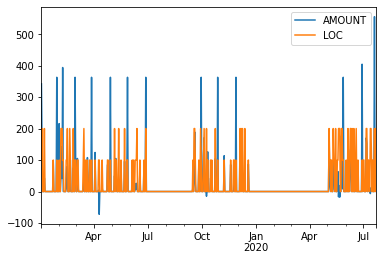

In [172]:
geolocal_df.plot()
pyplot.show()

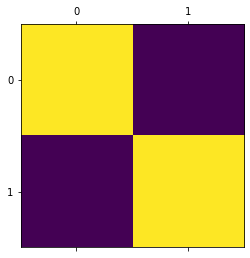

In [173]:
pyplot.matshow(geolocal_df.corr())
pyplot.show()

In [174]:
geolocal_df.corr()

,AMOUNT,LOC
AMOUNT,1.000000,0.541367
LOC,0.541367,1.000000


In [175]:
# Vemos que hay un grado de correlacion medio pero no muy fuerte entre la cuantia de sus transacciones y su 
# localizacion
# ie en las transacciones geolocalizadas AMOUNT es mayor y aun mas mayor cuando la LOC es 'Global' en lugar
# de 'España'

In [176]:
# METDODO 2: rellenando los huecos con el ultimo valor valido anterior
geolocal_filled_df

,AMOUNT,GEOLOC
2019-01-02,-341.85,5.0
2019-01-03,-142.0,3.2
2019-01-04,NaN,NaN
2019-01-05,NaN,NaN
2019-01-06,NaN,NaN
...,...,...
2020-07-19,NaN,NaN
2020-07-20,-555.36,2.2
2020-07-21,NaN,NaN
2020-07-22,-136.17,2.1


In [177]:
geolocal_filled_df.dtypes

AMOUNT    object
GEOLOC    object
dtype: object

In [178]:
# convertimos cada una de las dos columnas del dataframe de object a float

In [179]:
# pasamos IMPORTE a formato 'numeric'
geolocal_filled_AMOUNT_ser = geolocal_filled_df['AMOUNT'].T.squeeze()
geolocal_filled_AMOUNT_ser

2019-01-02   -341.85
2019-01-03    -142.0
2019-01-04       NaN
2019-01-05       NaN
2019-01-06       NaN
               ...  
2020-07-19       NaN
2020-07-20   -555.36
2020-07-21       NaN
2020-07-22   -136.17
2020-07-23    -13.53
Freq: D, Name: AMOUNT, Length: 569, dtype: object

In [180]:
geolocal_filled_AMOUNT_ser = pandas.to_numeric(geolocal_filled_AMOUNT_ser, errors='coerce')
geolocal_filled_AMOUNT_ser

2019-01-02   -341.85
2019-01-03   -142.00
2019-01-04       NaN
2019-01-05       NaN
2019-01-06       NaN
               ...  
2020-07-19       NaN
2020-07-20   -555.36
2020-07-21       NaN
2020-07-22   -136.17
2020-07-23    -13.53
Freq: D, Name: AMOUNT, Length: 569, dtype: float64

In [181]:
# añado la serie al dataframe como una columna
geolocal_filled_df.insert(2, 'AMOUNT_FLOAT', geolocal_filled_AMOUNT_ser)
geolocal_filled_df

,AMOUNT,GEOLOC,AMOUNT_FLOAT
2019-01-02,-341.85,5.0,-341.85
2019-01-03,-142.0,3.2,-142.00
2019-01-04,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN
...,...,...,...
2020-07-19,NaN,NaN,NaN
2020-07-20,-555.36,2.2,-555.36
2020-07-21,NaN,NaN,NaN
2020-07-22,-136.17,2.1,-136.17


In [182]:
geolocal_filled_df.dtypes

AMOUNT           object
GEOLOC           object
AMOUNT_FLOAT    float64
dtype: object

In [183]:
# convertimos la comuna GEOLOC a float
geolocal_filled_GEOLOC_ser = geolocal_filled_df['GEOLOC'].T.squeeze()
geolocal_filled_GEOLOC_ser

2019-01-02    5.0
2019-01-03    3.2
2019-01-04    NaN
2019-01-05    NaN
2019-01-06    NaN
             ... 
2020-07-19    NaN
2020-07-20    2.2
2020-07-21    NaN
2020-07-22    2.1
2020-07-23    1.0
Freq: D, Name: GEOLOC, Length: 569, dtype: object

In [184]:
geolocal_filled_GEOLOC_ser = pandas.to_numeric(geolocal_filled_GEOLOC_ser, errors='coerce')
geolocal_filled_GEOLOC_ser

2019-01-02    5.0
2019-01-03    3.2
2019-01-04    NaN
2019-01-05    NaN
2019-01-06    NaN
             ... 
2020-07-19    NaN
2020-07-20    2.2
2020-07-21    NaN
2020-07-22    2.1
2020-07-23    1.0
Freq: D, Name: GEOLOC, Length: 569, dtype: float64

In [185]:
# añado la serie al dataframe como una columna
geolocal_filled_df.insert(3, 'GEOLOC_FLOAT', geolocal_filled_GEOLOC_ser)
geolocal_filled_df

,AMOUNT,GEOLOC,AMOUNT_FLOAT,GEOLOC_FLOAT
2019-01-02,-341.85,5.0,-341.85,5.0
2019-01-03,-142.0,3.2,-142.00,3.2
2019-01-04,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-19,NaN,NaN,NaN,NaN
2020-07-20,-555.36,2.2,-555.36,2.2
2020-07-21,NaN,NaN,NaN,NaN
2020-07-22,-136.17,2.1,-136.17,2.1


In [186]:
geolocal_filled_df.dtypes

AMOUNT           object
GEOLOC           object
AMOUNT_FLOAT    float64
GEOLOC_FLOAT    float64
dtype: object

In [187]:
# quitamos las columnas AMOUNT y GEOLOC q ya no nos hacen falta
geolocal_filled_df.drop(columns=['AMOUNT','GEOLOC'], inplace=True)
geolocal_filled_df

,AMOUNT_FLOAT,GEOLOC_FLOAT
2019-01-02,-341.85,5.0
2019-01-03,-142.00,3.2
2019-01-04,NaN,NaN
2019-01-05,NaN,NaN
2019-01-06,NaN,NaN
...,...,...
2020-07-19,NaN,NaN
2020-07-20,-555.36,2.2
2020-07-21,NaN,NaN
2020-07-22,-136.17,2.1


In [188]:
# renombro las columnas
geolocal_filled_df.rename(columns={"AMOUNT_FLOAT": "AMOUNT", "GEOLOC_FLOAT": "GEOLOC"}, errors="raise", 
                          inplace=True)
geolocal_filled_df

,AMOUNT,GEOLOC
2019-01-02,-341.85,5.0
2019-01-03,-142.00,3.2
2019-01-04,NaN,NaN
2019-01-05,NaN,NaN
2019-01-06,NaN,NaN
...,...,...
2020-07-19,NaN,NaN
2020-07-20,-555.36,2.2
2020-07-21,NaN,NaN
2020-07-22,-136.17,2.1


In [189]:
# rellenamos los NaN con el ultimo valor numérico anterior
geolocal_filled_df['AMOUNT'].fillna(method='ffill', inplace=True)
geolocal_filled_df

,AMOUNT,GEOLOC
2019-01-02,-341.85,5.0
2019-01-03,-142.00,3.2
2019-01-04,-142.00,NaN
2019-01-05,-142.00,NaN
2019-01-06,-142.00,NaN
...,...,...
2020-07-19,-12.72,NaN
2020-07-20,-555.36,2.2
2020-07-21,-555.36,NaN
2020-07-22,-136.17,2.1


In [190]:
# rellenamos los NaN con el ultimo valor numérico anterior
geolocal_filled_df['GEOLOC'].fillna(method='ffill', inplace=True)
geolocal_filled_df

,AMOUNT,GEOLOC
2019-01-02,-341.85,5.0
2019-01-03,-142.00,3.2
2019-01-04,-142.00,3.2
2019-01-05,-142.00,3.2
2019-01-06,-142.00,3.2
...,...,...
2020-07-19,-12.72,1.0
2020-07-20,-555.36,2.2
2020-07-21,-555.36,2.2
2020-07-22,-136.17,2.1


In [191]:
# me creo una nueva columna LOC_INT donde si el valor de GEOLOC vale 100 si es entero y 200 si es float
geolocal_filled_df['LOC_INT'] = numpy.select([geolocal_filled_df['GEOLOC'] % 1 == 0,
                                              geolocal_filled_df['GEOLOC'] % 1 != 0],
                                             [100, 200])
geolocal_filled_df

,AMOUNT,GEOLOC,LOC_INT
2019-01-02,-341.85,5.0,100
2019-01-03,-142.00,3.2,200
2019-01-04,-142.00,3.2,200
2019-01-05,-142.00,3.2,200
2019-01-06,-142.00,3.2,200
...,...,...,...
2020-07-19,-12.72,1.0,100
2020-07-20,-555.36,2.2,200
2020-07-21,-555.36,2.2,200
2020-07-22,-136.17,2.1,200


In [192]:
# modifico la columna LOC_INT para que valga 0 cuando GEOLOC valga 0
# (en este caso GEOLOC no va a valer 0 nunca)
geolocal_filled_df.loc[(geolocal_filled_df.GEOLOC == 0), 'LOC_INT']= 0
geolocal_filled_df

,AMOUNT,GEOLOC,LOC_INT
2019-01-02,-341.85,5.0,100
2019-01-03,-142.00,3.2,200
2019-01-04,-142.00,3.2,200
2019-01-05,-142.00,3.2,200
2019-01-06,-142.00,3.2,200
...,...,...,...
2020-07-19,-12.72,1.0,100
2020-07-20,-555.36,2.2,200
2020-07-21,-555.36,2.2,200
2020-07-22,-136.17,2.1,200


In [193]:
# multiplico la columna AMOUNT por -1 porque es más facil representar valores positivos
geolocal_filled_df['AMOUNT'] = -geolocal_filled_df['AMOUNT']
geolocal_filled_df

,AMOUNT,GEOLOC,LOC_INT
2019-01-02,341.85,5.0,100
2019-01-03,142.00,3.2,200
2019-01-04,142.00,3.2,200
2019-01-05,142.00,3.2,200
2019-01-06,142.00,3.2,200
...,...,...,...
2020-07-19,12.72,1.0,100
2020-07-20,555.36,2.2,200
2020-07-21,555.36,2.2,200
2020-07-22,136.17,2.1,200


In [194]:
# la columna GEOLOC ya no la necesito
geolocal_filled_df.drop(columns=['GEOLOC'], inplace=True)
geolocal_filled_df

,AMOUNT,LOC_INT
2019-01-02,341.85,100
2019-01-03,142.00,200
2019-01-04,142.00,200
2019-01-05,142.00,200
2019-01-06,142.00,200
...,...,...
2020-07-19,12.72,100
2020-07-20,555.36,200
2020-07-21,555.36,200
2020-07-22,136.17,200


In [195]:
# renombro la columna LOC_INT a LOC
geolocal_filled_df.rename(columns={'AMOUNT': 'AMOUNT', 'LOC_INT': 'LOC'}, inplace=True)
geolocal_filled_df

,AMOUNT,LOC
2019-01-02,341.85,100
2019-01-03,142.00,200
2019-01-04,142.00,200
2019-01-05,142.00,200
2019-01-06,142.00,200
...,...,...
2020-07-19,12.72,100
2020-07-20,555.36,200
2020-07-21,555.36,200
2020-07-22,136.17,200


In [196]:
# antes de hacer una prediccion con prophet vamos a comprobar si este serie 'geolocal_df' es modelizable

In [197]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [198]:
# 1. Time Series Line Plot

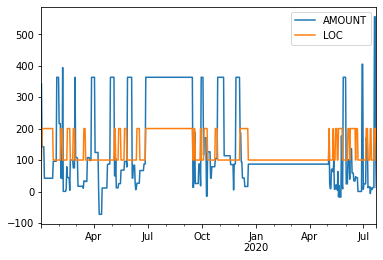

In [199]:
# pinto la evolucion temporal de AMOUNT y de LOC rellenando los huecos con el ultimo valor valido
geolocal_filled_df.plot()
pyplot.show()

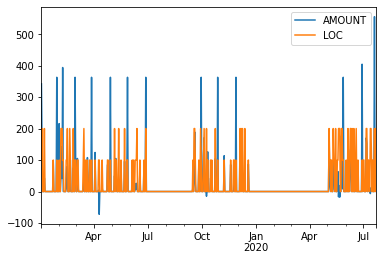

In [200]:
# comparo con la evolucion temporal de MOUNT y de LOC rellenando con 0.0 en los huecos
geolocal_df.plot()
pyplot.show()

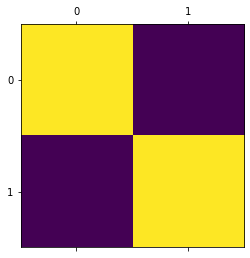

In [201]:
pyplot.matshow(geolocal_filled_df.corr())
pyplot.show()

In [202]:
geolocal_filled_df.corr()

,AMOUNT,LOC
AMOUNT,1.000000,0.286951
LOC,0.286951,1.000000


In [203]:
# la correlacion rellnando huecos con el ultimo valor valido ha bajado de 0.54 (rellenando huecos con 0.0) 
# a 0.28 (rellenando con el ultimo valor valido) que es un valor de correlacion muy bajo (aun mas bajo que antes)
# entre ambas variables

In [204]:
"""
CONCLUSION: no se puede establecer una correlacion significativa entre la localizacion del usuario y la 
cuantia de sus transacciones

CONCLUSION: rellenando los huecos con el ultimo valor valido puede dar lugar a grandes errores al determinar
la localizacion del usuario
"""

'\nCONCLUSION: no se puede establecer una correlacion significativa entre la localizacion del usuario y la \ncuantia de sus transacciones\n\nCONCLUSION: rellenando los huecos con el ultimo valor valido puede dar lugar a grandes errores al determinar\nla localizacion del usuario\n'

In [205]:
geolocal_df

,AMOUNT,LOC
2019-01-02,341.85,100
2019-01-03,142.00,200
2019-01-04,-0.00,0
2019-01-05,-0.00,0
2019-01-06,-0.00,0
...,...,...
2020-07-19,-0.00,0
2020-07-20,555.36,200
2020-07-21,-0.00,0
2020-07-22,136.17,200


In [206]:
loc_temporal_df = geolocal_df.copy(deep=True)
loc_temporal_df

,AMOUNT,LOC
2019-01-02,341.85,100
2019-01-03,142.00,200
2019-01-04,-0.00,0
2019-01-05,-0.00,0
2019-01-06,-0.00,0
...,...,...
2020-07-19,-0.00,0
2020-07-20,555.36,200
2020-07-21,-0.00,0
2020-07-22,136.17,200


In [207]:
loc_temporal_df.drop(columns='AMOUNT', inplace=True)
loc_temporal_df

,LOC
2019-01-02,100
2019-01-03,200
2019-01-04,0
2019-01-05,0
2019-01-06,0
...,...
2020-07-19,0
2020-07-20,200
2020-07-21,0
2020-07-22,200


In [208]:
""" Tengo 569 observaciones o 1.55 años """

' Tengo 569 observaciones o 1.55 años '

In [209]:
# antes de hacer una prediccion con prophet vamos a comprobar si esta serie 'loc_temporal_df' es modelizable

In [210]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [211]:
# 1. Time Series Line Plot

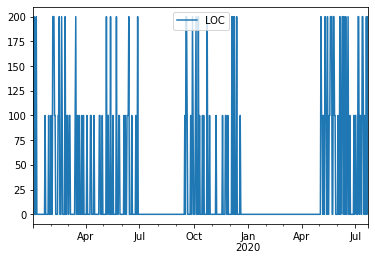

In [212]:
loc_temporal_df.plot()
pyplot.show()

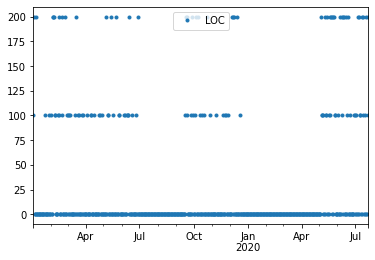

In [213]:
loc_temporal_df.plot(style='.')
pyplot.show()

In [214]:
"""
no podemos obtener conclusiones claras sobre si esta serie es facil de modelizar.
pero sale un grafico del mismo tipo que el de 'supermercados' e incluso con los datos menos 
dispersos (supermercados de 0 a 400, frente a restaurantes o loc_temporal de 0 a 200)
"""

"\nno podemos obtener conclusiones claras sobre si esta serie es facil de modelizar.\npero sale un grafico del mismo tipo que el de 'supermercados' e incluso con los datos menos \ndispersos (supermercados de 0 a 400, frente a restaurantes o loc_temporal de 0 a 200)\n"

In [215]:
# 2. Time Series Histogram and Density Plots

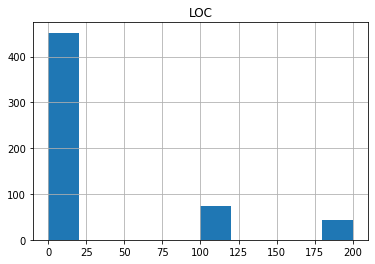

In [216]:
loc_temporal_df.hist()
pyplot.show()

In [217]:
"""
Es una distribucion discontinua (solo toma valores 0, 100 y 200) y asimetrica a la derecha.
moda (0) <= mediana (0) < media (28.29)

min = 0
q1 = q2 = q3 = mode = 0
mean = 28.29
max = 2000

Vemos que claramente la mayoria de las observaciones valen 0 o no tienen localizacion q3 = mode = 0.
"""

'\nEs una distribucion discontinua (solo toma valores 0, 100 y 200) y asimetrica a la derecha.\nmoda (0) <= mediana (0) < media (28.29)\n\nmin = 0\nq1 = q2 = q3 = mode = 0\nmean = 28.29\nmax = 2000\n\nVemos que claramente la mayoria de las observaciones valen 0 o no tienen localizacion q3 = mode = 0.\n'

In [218]:
loc_temporal_df.describe()

,LOC
count,569.000000
mean,28.295255
std,59.847906
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,200.000000


In [219]:
# calculamos la moda
stat_mode = statistics.mode(loc_temporal_df['LOC'])
stat_mode

0

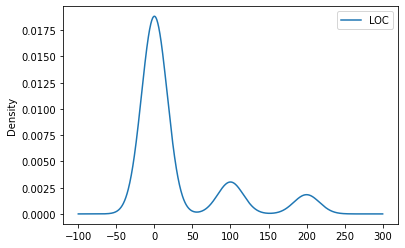

In [220]:
loc_temporal_df.plot(kind='kde')
pyplot.show()

In [221]:
"""
El diagrama de densidad es un reflejo aun mas acentuado que el histograma donde vemos que la cantidad de 
observaciones con el valor 0 es 0.0175/0.0025 = 7 veces superior a la cantidad de observaciones con valor 100.

CONCLUSION: la mayor parte de las observaciones no tienen localizacion
"""

'\nEl diagrama de densidad es un reflejo aun mas acentuado que el histograma donde vemos que la cantidad de \nobservaciones con el valor 0 es 0.0175/0.0025 = 7 veces superior a la cantidad de observaciones con valor 100.\n\nCONCLUSION: la mayor parte de las observaciones no tienen localizacion\n'

In [222]:
# 3. Time Series Box and Whisker Plots by Interval

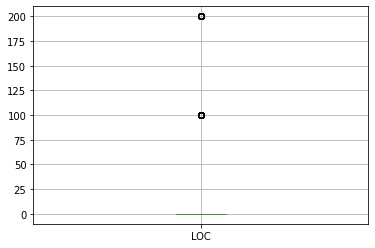

In [223]:
loc_temporal_df.boxplot()
pyplot.show()

In [224]:
"""
Sale un boxplot concentrado en el valor 0 y con outliers en 100 y 200.

CONCLUSION: las transacciones que tienen localizacion son excepcionales.
"""

'\nSale un boxplot concentrado en el valor 0 y con outliers en 100 y 200.\n\nCONCLUSION: las transacciones que tienen localizacion son excepcionales.\n'

In [225]:
# 4. Time Series Heat Maps

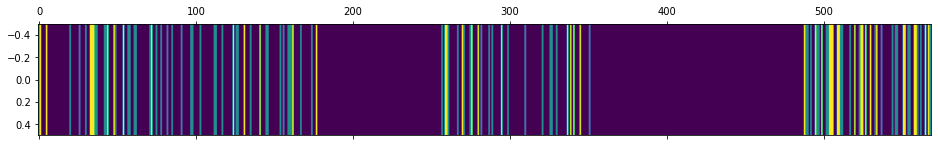

In [226]:
pyplot.matshow(loc_temporal_df.T, interpolation=None, aspect='auto')
pyplot.show()

In [227]:
"""
El mapa de color es un reflejo de la evolucion temporal de las observaciones que vemos que casi siempre valen 0.
"""

'\nEl mapa de color es un reflejo de la evolucion temporal de las observaciones que vemos que casi siempre valen 0.\n'

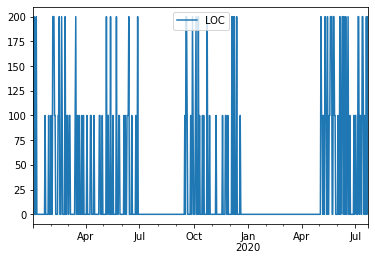

In [228]:
loc_temporal_df.plot()
pyplot.show()

In [229]:
# 5. Time Series Lag Scatter Plots

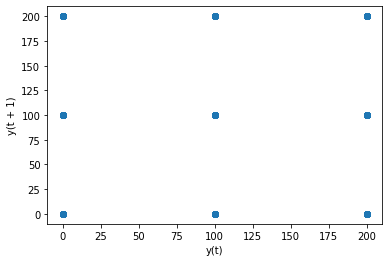

In [230]:
lag_plot(loc_temporal_df)
pyplot.show()

In [231]:
"""
No podemos obtener informacion sobre la predictibilidad de la serie puesto que las observaciones solo toman valores
0, 100 y 200 y en la mayor parte de las ocasiones valen 0 al pintar el lag_plot entre y(t+1) e y(t)
"""

'\nNo podemos obtener informacion sobre la predictibilidad de la serie puesto que las observaciones solo toman valores\n0, 100 y 200 y en la mayor parte de las ocasiones valen 0 al pintar el lag_plot entre y(t+1) e y(t)\n'

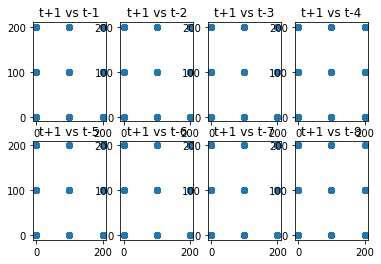

In [232]:
values = DataFrame(loc_temporal_df.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

In [233]:
"""
Al dibujar el lagplot entre y(t+1) y sus 8 primeros lags obtengo identico resultado que cuando pinte el lagplot
t+1 vs t-1
"""

'\nAl dibujar el lagplot entre y(t+1) y sus 8 primeros lags obtengo identico resultado que cuando pinte el lagplot\nt+1 vs t-1\n'

t+1 vs t-1


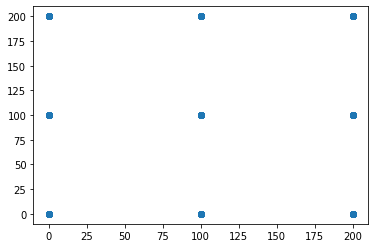

t+1 vs t-2


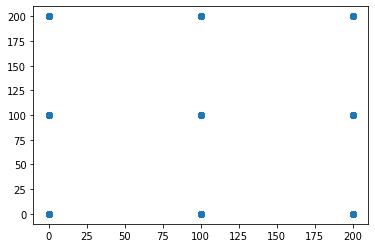

t+1 vs t-3


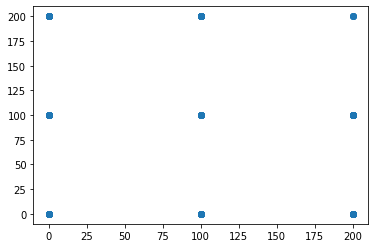

t+1 vs t-4


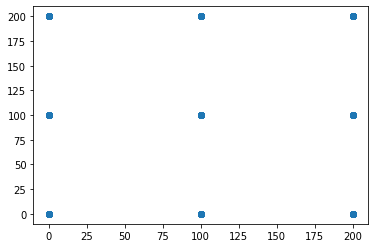

t+1 vs t-5


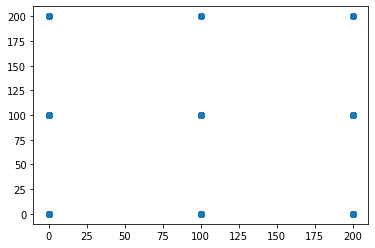

t+1 vs t-6


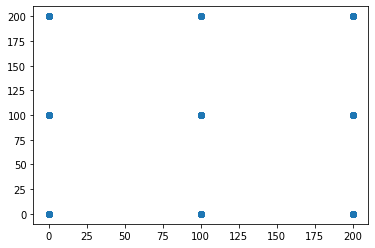

t+1 vs t-7


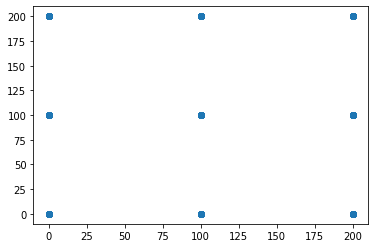

t+1 vs t-8


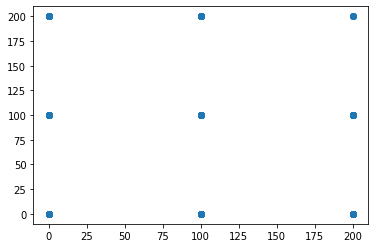

t+1 vs t-9


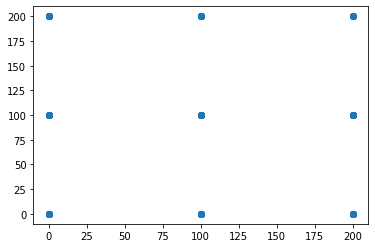

t+1 vs t-10


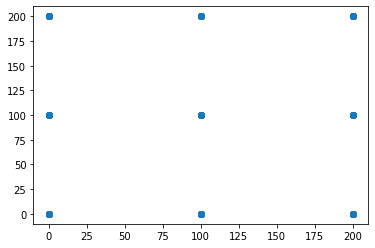

t+1 vs t-11


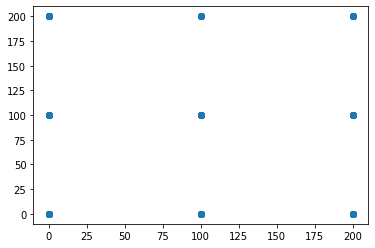

t+1 vs t-12


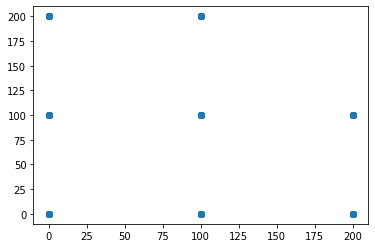

t+1 vs t-13


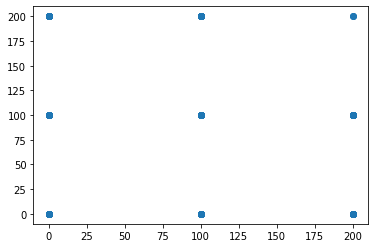

t+1 vs t-14


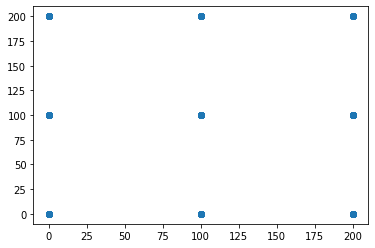

t+1 vs t-15


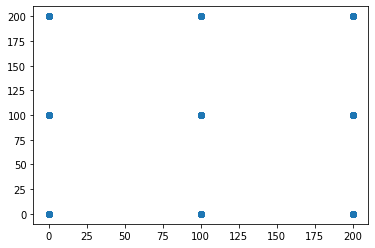

t+1 vs t-16


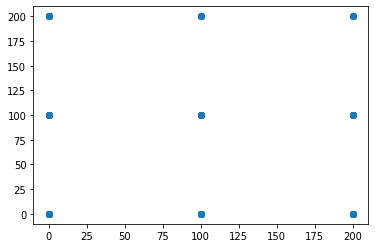

t+1 vs t-17


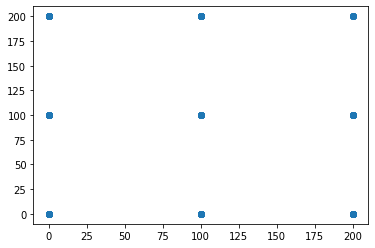

t+1 vs t-18


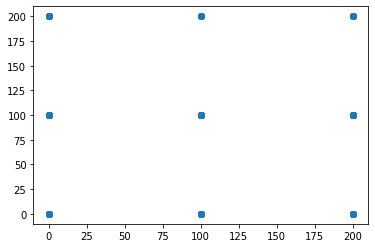

t+1 vs t-19


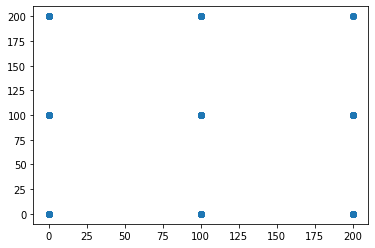

t+1 vs t-20


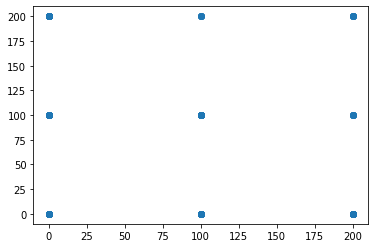

t+1 vs t-21


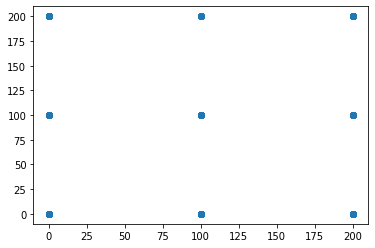

t+1 vs t-22


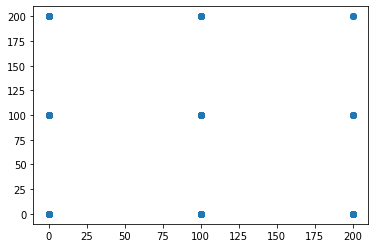

t+1 vs t-23


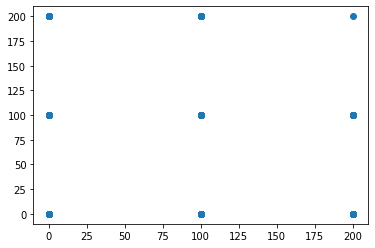

t+1 vs t-24


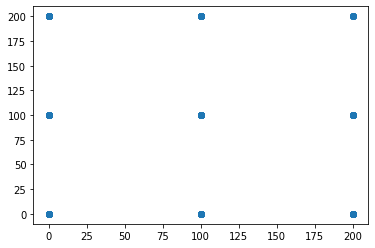

t+1 vs t-25


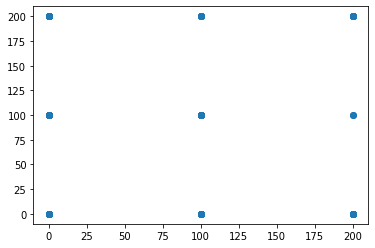

t+1 vs t-26


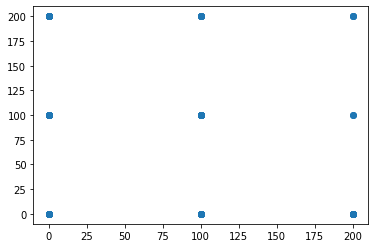

t+1 vs t-27


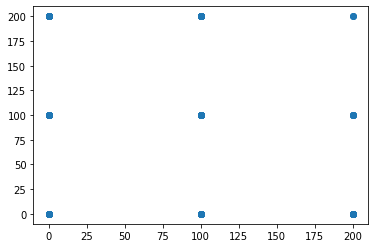

t+1 vs t-28


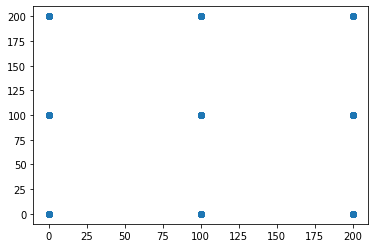

t+1 vs t-29


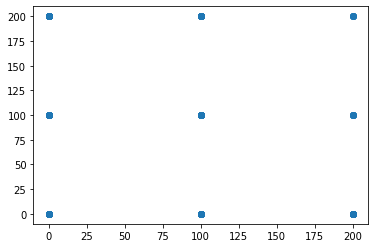

t+1 vs t-30


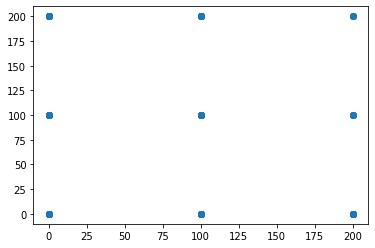

t+1 vs t-31


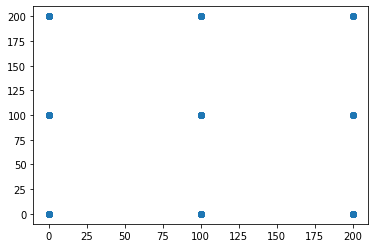

t+1 vs t-32


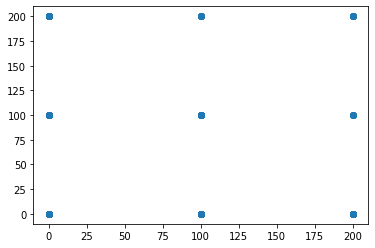

t+1 vs t-33


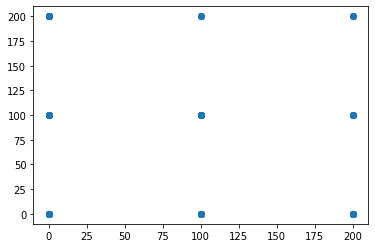

t+1 vs t-34


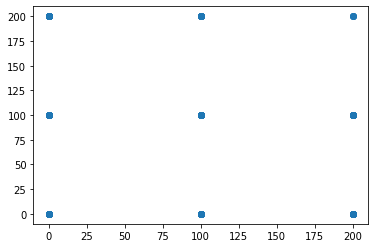

t+1 vs t-35


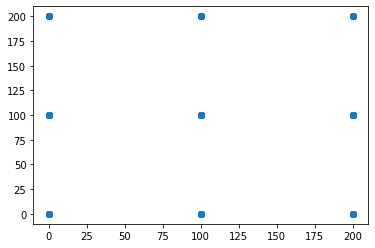

t+1 vs t-36


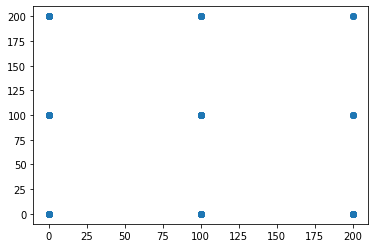

t+1 vs t-37


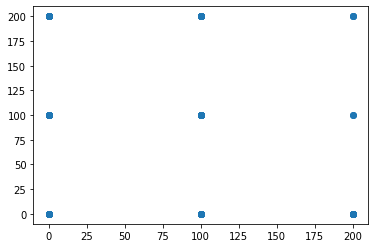

t+1 vs t-38


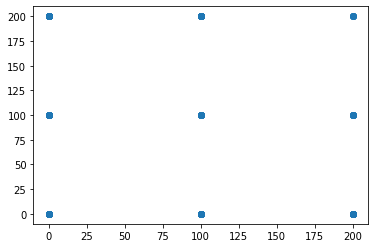

t+1 vs t-39


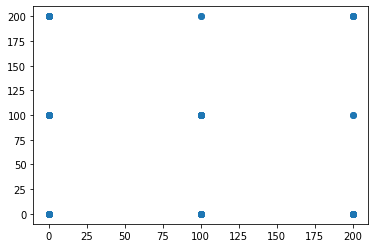

t+1 vs t-40


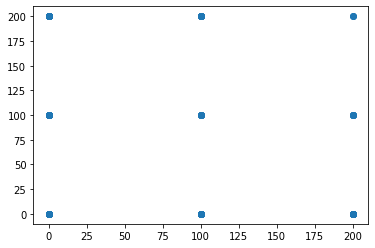

t+1 vs t-41


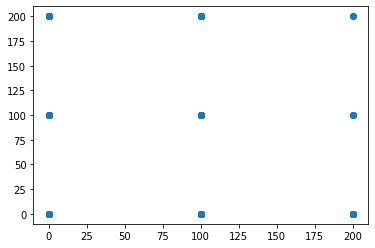

t+1 vs t-42


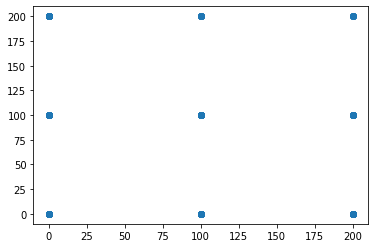

t+1 vs t-43


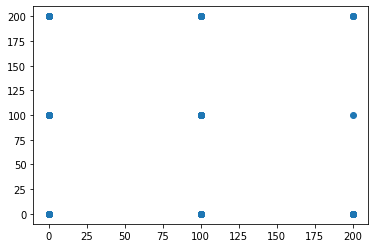

t+1 vs t-44


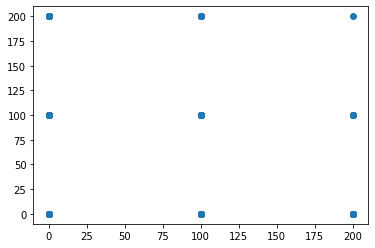

t+1 vs t-45


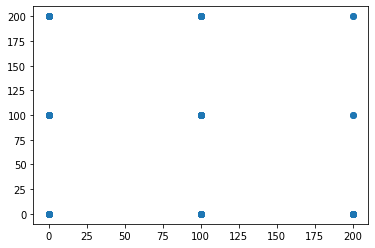

t+1 vs t-46


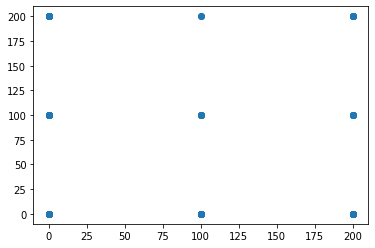

t+1 vs t-47


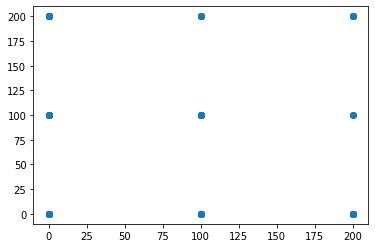

t+1 vs t-48


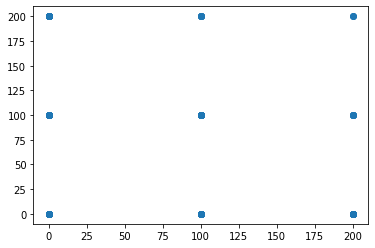

t+1 vs t-49


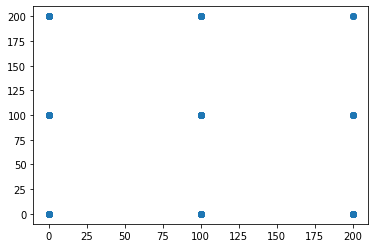

t+1 vs t-50


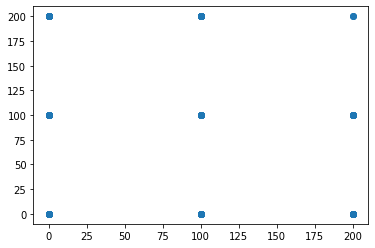

t+1 vs t-51


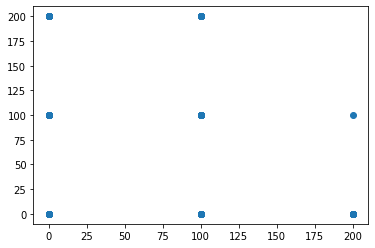

t+1 vs t-52


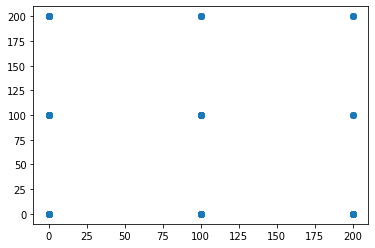

t+1 vs t-53


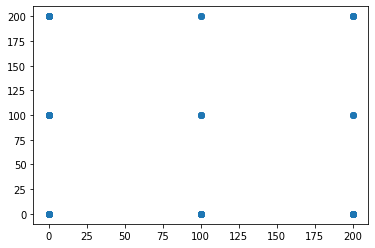

t+1 vs t-54


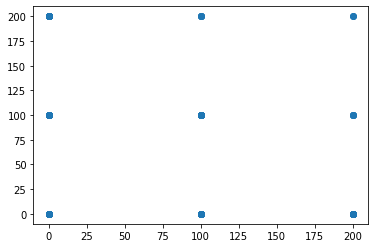

t+1 vs t-55


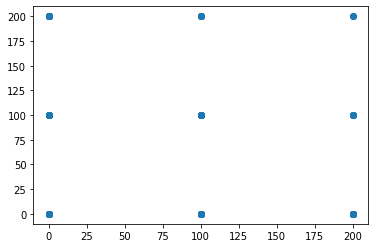

t+1 vs t-56


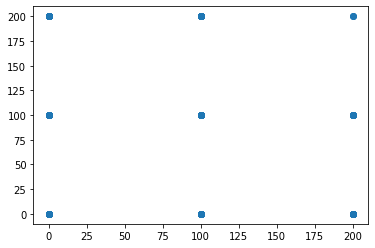

t+1 vs t-57


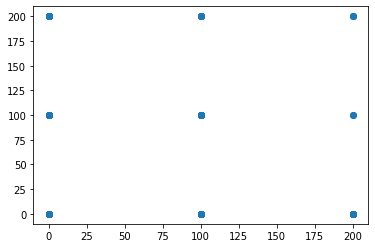

t+1 vs t-58


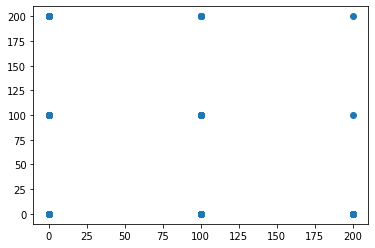

t+1 vs t-59


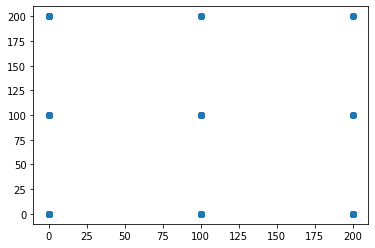

t+1 vs t-60


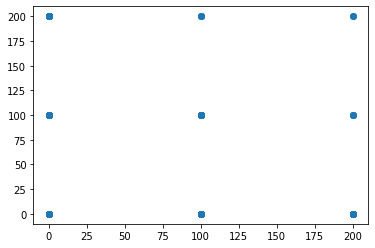

t+1 vs t-61


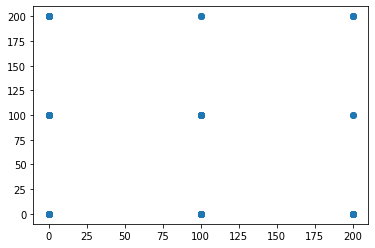

t+1 vs t-62


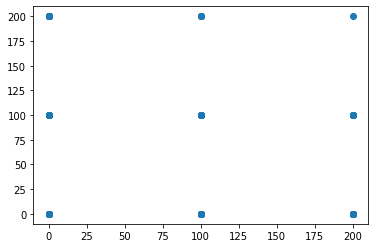

t+1 vs t-63


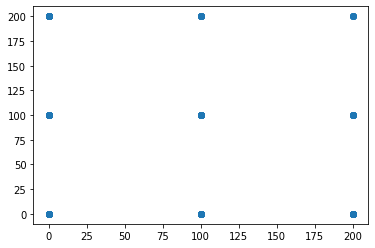

t+1 vs t-64


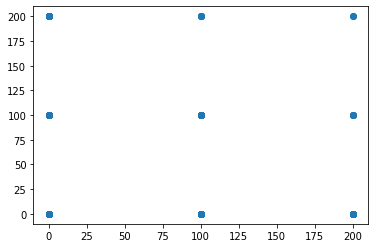

t+1 vs t-65


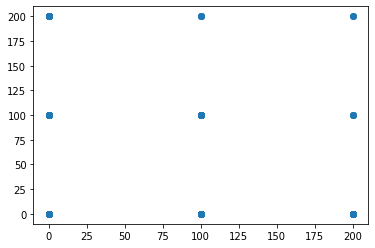

t+1 vs t-66


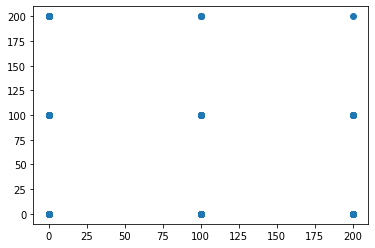

t+1 vs t-67


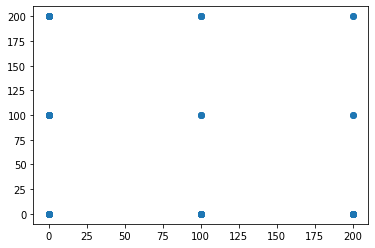

t+1 vs t-68


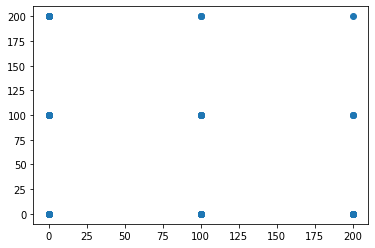

t+1 vs t-69


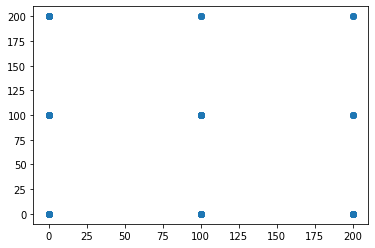

t+1 vs t-70


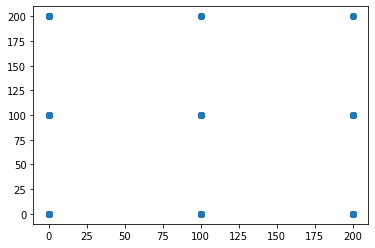

t+1 vs t-71


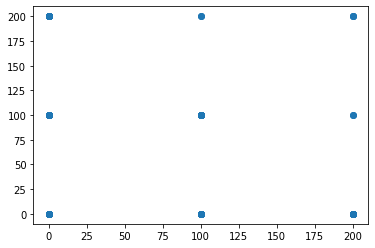

t+1 vs t-72


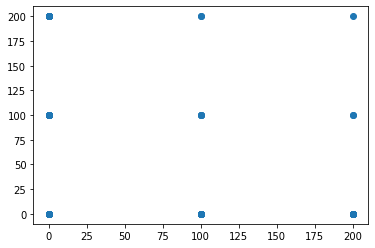

t+1 vs t-73


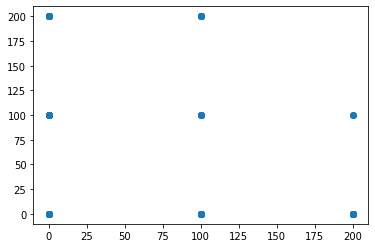

t+1 vs t-74


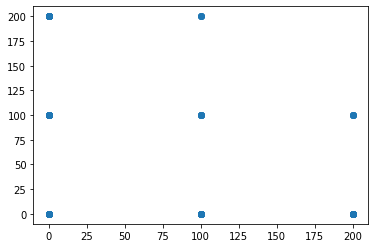

t+1 vs t-75


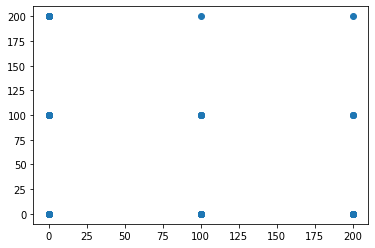

t+1 vs t-76


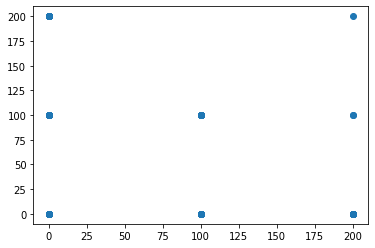

t+1 vs t-77


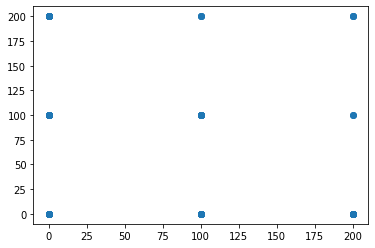

t+1 vs t-78


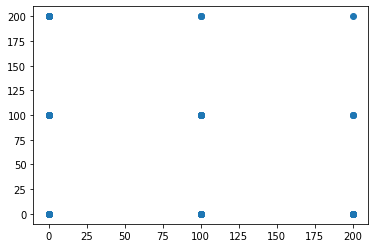

t+1 vs t-79


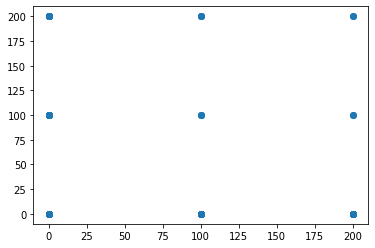

t+1 vs t-80


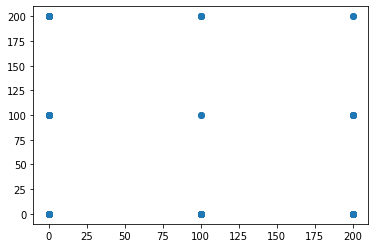

t+1 vs t-81


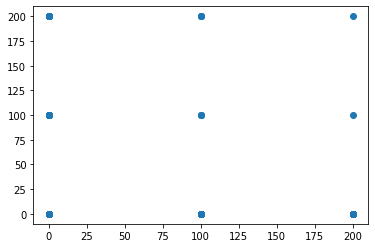

t+1 vs t-82


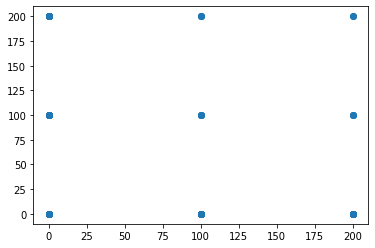

t+1 vs t-83


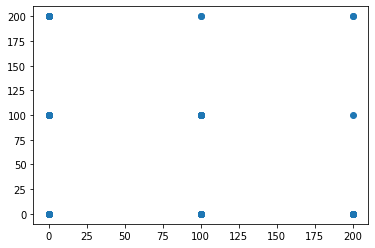

t+1 vs t-84


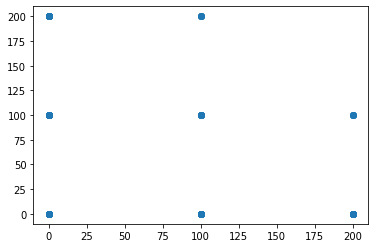

t+1 vs t-85


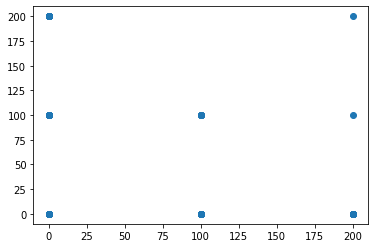

t+1 vs t-86


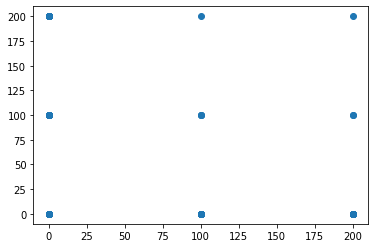

t+1 vs t-87


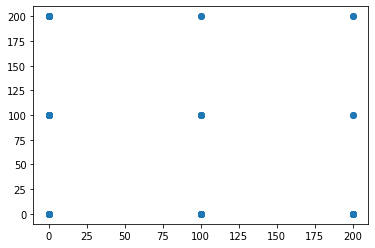

t+1 vs t-88


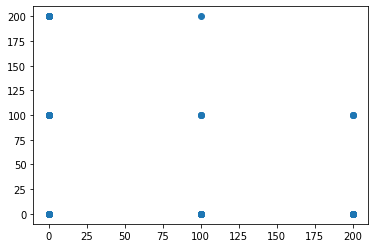

t+1 vs t-89


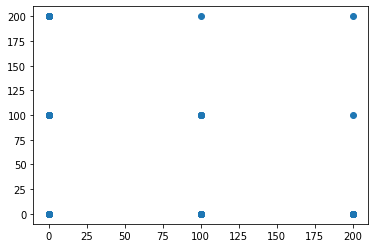

t+1 vs t-90


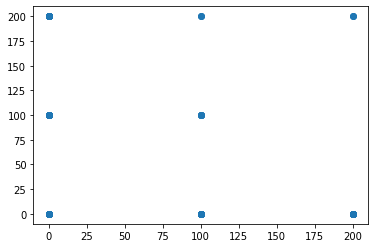

t+1 vs t-91


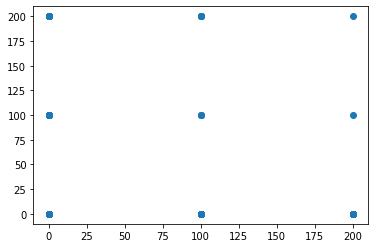

t+1 vs t-92


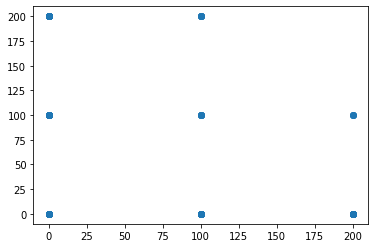

t+1 vs t-93


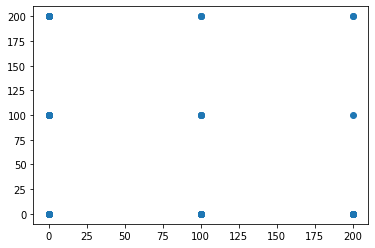

t+1 vs t-94


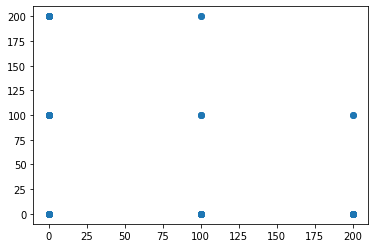

t+1 vs t-95


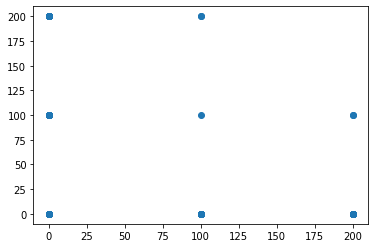

t+1 vs t-96


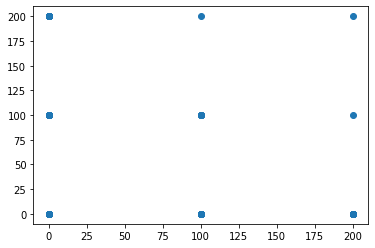

t+1 vs t-97


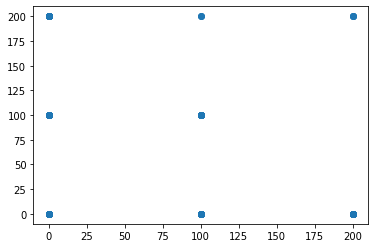

t+1 vs t-98


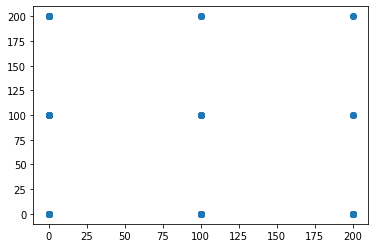

t+1 vs t-99


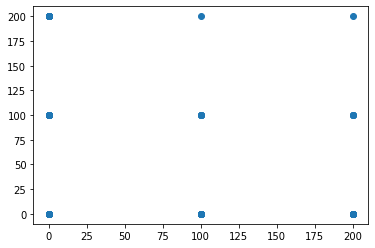

t+1 vs t-100


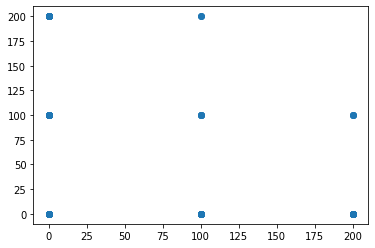

In [234]:
values = DataFrame(loc_temporal_df.values)
# lags = loc_temporal_df.size
lags = 100
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
for i in range(1,(lags + 1)):
	print('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
	pyplot.show()

In [235]:
"""
Y obtengo el mismo resultado  que en los dos anteriores calculos cuando pinto el lagplot y(t+1) vs sus 100 1os 
lags.
De los lagplots no puedo sacar información sobre la predicibilidad de la serie.
"""

'\nY obtengo el mismo resultado  que en los dos anteriores calculos cuando pinto el lagplot y(t+1) vs sus 100 1os \nlags.\nDe los lagplots no puedo sacar información sobre la predicibilidad de la serie.\n'

In [236]:
# 6. Time Series Autocorrelation Plots

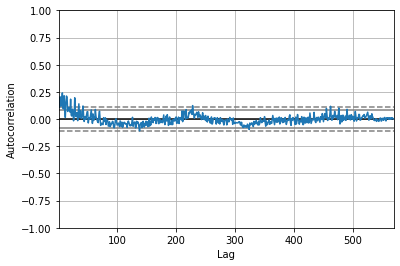

In [237]:
autocorrelation_plot(loc_temporal_df)
pyplot.show()

In [238]:
"""
CONCLUSION: esta serie temporal no es predecible.
Sólo tiene correlacion estadisticamente significativa con las 1a docena de valores aproximadamente.
Y esta correlación estadísticamente significativa además es baja (inferior a 0.25)
"""

'\nCONCLUSION: esta serie temporal no es predecible.\nSólo tiene correlacion estadisticamente significativa con las 1a docena de valores aproximadamente.\nY esta correlación estadísticamente significativa además es baja (inferior a 0.25)\n'

In [239]:
# No obstante vamos a hacer con prophet una prediccion a 3 meses de la serie temporal a ver si podemos predecir
# la localizacion del usuario en funcion del tiempo

In [242]:
# Forecast IMPORTE With Prophet

In [243]:
# Fit Prophet Model

In [244]:
df = loc_temporal_df.copy(deep=True)
df

,LOC
2019-01-02,100
2019-01-03,200
2019-01-04,0
2019-01-05,0
2019-01-06,0
...,...
2020-07-19,0
2020-07-20,200
2020-07-21,0
2020-07-22,200


In [245]:
df['FECHA'] = df.index
df

,LOC,FECHA
2019-01-02,100,2019-01-02
2019-01-03,200,2019-01-03
2019-01-04,0,2019-01-04
2019-01-05,0,2019-01-05
2019-01-06,0,2019-01-06
...,...,...
2020-07-19,0,2020-07-19
2020-07-20,200,2020-07-20
2020-07-21,0,2020-07-21
2020-07-22,200,2020-07-22


In [247]:
df = df[['FECHA', 'LOC']]
df

,FECHA,LOC
2019-01-02,2019-01-02,100
2019-01-03,2019-01-03,200
2019-01-04,2019-01-04,0
2019-01-05,2019-01-05,0
2019-01-06,2019-01-06,0
...,...,...
2020-07-19,2020-07-19,0
2020-07-20,2020-07-20,200
2020-07-21,2020-07-21,0
2020-07-22,2020-07-22,200


In [248]:
df.reset_index(drop=True, inplace=True)
df

,FECHA,LOC
0,2019-01-02,100
1,2019-01-03,200
2,2019-01-04,0
3,2019-01-05,0
4,2019-01-06,0
...,...,...
564,2020-07-19,0
565,2020-07-20,200
566,2020-07-21,0
567,2020-07-22,200


In [253]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
df

,ds,y
0,2019-01-02,100
1,2019-01-03,200
2,2019-01-04,0
3,2019-01-05,0
4,2019-01-06,0
...,...,...
564,2020-07-19,0
565,2020-07-20,200
566,2020-07-21,0
567,2020-07-22,200


In [254]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [256]:
# A continuacion vamos a obtener un dataframe de train desde 2019-01-02 hasta 2020-05-31
# y un dataframe de test desde 2020-06-01 hasta 2020-07-23

In [257]:
df.index[df['ds'] == '2019-01-02']

Int64Index([0], dtype='int64')

In [259]:
df.index[df['ds'] == '2020-05-31']

Int64Index([515], dtype='int64')

In [260]:
df.index[df['ds'] == '2020-06-01']

Int64Index([516], dtype='int64')

In [262]:
df.index[df['ds'] == '2020-07-23']

Int64Index([568], dtype='int64')

In [275]:
len(df.index)-1

568

In [276]:
prophet_train_df = df.iloc[:515,:]
prophet_train_df

,ds,y
0,2019-01-02,100
1,2019-01-03,200
2,2019-01-04,0
3,2019-01-05,0
4,2019-01-06,0
...,...,...
510,2020-05-26,200
511,2020-05-27,100
512,2020-05-28,100
513,2020-05-29,0


In [277]:
prophet_train_df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [278]:
prophet_test_df = df.iloc[516:,:]
prophet_test_df

,ds,y
516,2020-06-01,0
517,2020-06-02,100
518,2020-06-03,0
519,2020-06-04,0
520,2020-06-05,200
...,...,...
564,2020-07-19,0
565,2020-07-20,200
566,2020-07-21,0
567,2020-07-22,200


In [279]:
prophet_test_df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [284]:
# define the model
model = Prophet()
# fit the model
model.fit(prophet_train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -29.7533


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65       419.833   0.000265644       78.7927   3.937e-06       0.001      123  LS failed, Hessian reset 
      99       419.849   2.24224e-06       74.8419      0.7435      0.7435      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       419.859   5.98209e-05       67.2924   8.785e-07       0.001      279  LS failed, Hessian reset 
     161       419.862   1.33095e-06       65.8224   1.735e-08       0.001      368  LS failed, Hessian reset 
     177       419.862   1.17346e-08       59.3119      0.4538      0.4538      394   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [285]:
# Make an In-Sample Forecast

In [286]:
# Vamos a hacer un In-Sample Forecast de las observaciones desde el 2019-01-02 hasta el 2020-05-30

In [287]:
prophet_train_df

,ds,y
0,2019-01-02,100
1,2019-01-03,200
2,2019-01-04,0
3,2019-01-05,0
4,2019-01-06,0
...,...,...
510,2020-05-26,200
511,2020-05-27,100
512,2020-05-28,100
513,2020-05-29,0


In [288]:
future_in_sample_df=prophet_train_df.copy(deep=True)
future_in_sample_df

,ds,y
0,2019-01-02,100
1,2019-01-03,200
2,2019-01-04,0
3,2019-01-05,0
4,2019-01-06,0
...,...,...
510,2020-05-26,200
511,2020-05-27,100
512,2020-05-28,100
513,2020-05-29,0


In [289]:
future_in_sample_df=future_in_sample_df.drop(['y'], axis = 1)
future_in_sample_df

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-05
4,2019-01-06
...,...
510,2020-05-26
511,2020-05-27
512,2020-05-28
513,2020-05-29


In [290]:
future_in_sample_df.reset_index(level=0, inplace=True)
future_in_sample_df

,index,ds
0,0,2019-01-02
1,1,2019-01-03
2,2,2019-01-04
3,3,2019-01-05
4,4,2019-01-06
...,...,...
510,510,2020-05-26
511,511,2020-05-27
512,512,2020-05-28
513,513,2020-05-29


In [291]:
future_in_sample_df=future_in_sample_df.drop(['index'], axis = 1)
future_in_sample_df

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-05
4,2019-01-06
...,...
510,2020-05-26
511,2020-05-27
512,2020-05-28
513,2020-05-29


In [292]:
future_in_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [293]:
future_in_sample_df.columns

Index(['ds'], dtype='object')

In [294]:
future_in_sample_df['ds']=to_datetime(future_in_sample_df['ds'])

In [295]:
# vemos que antes de hacer el cambio de tipo a datetime ya estaba en formato datetime
future_in_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [296]:
future_in_sample_df.columns

Index(['ds'], dtype='object')

In [297]:
# use the model to make a forecast
forecast_df = model.predict(future_in_sample_df)

In [298]:
"""
The result of the predict() function is a DataFrame that contains many columns. 
Perhaps the most important columns are the forecast date time (‘ds‘), the forecasted value (‘yhat‘), 
and the lower and upper bounds on the predicted value (‘yhat_lower‘ and ‘yhat_upper‘) that provide uncertainty 
of the forecast.
"""

'\nThe result of the predict() function is a DataFrame that contains many columns. \nPerhaps the most important columns are the forecast date time (‘ds‘), the forecasted value (‘yhat‘), \nand the lower and upper bounds on the predicted value (‘yhat_lower‘ and ‘yhat_upper‘) that provide uncertainty \nof the forecast.\n'

In [299]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds       yhat  yhat_lower  yhat_upper
0   2019-01-02  38.982530  -31.207147  108.825390
1   2019-01-03  45.724783  -20.427853  111.895137
2   2019-01-04  41.649116  -24.065069  113.687372
3   2019-01-05  15.937864  -50.678581   89.432238
4   2019-01-06  14.535424  -58.042835   77.070392
..         ...        ...         ...         ...
510 2020-05-26  16.829542  -46.203184   90.378526
511 2020-05-27  21.795136  -44.083050   94.805623
512 2020-05-28  28.573622  -43.876603   91.511367
513 2020-05-29  24.534188  -50.404947   93.402982
514 2020-05-30  -1.140831  -70.619398   66.160997

[515 rows x 4 columns]


In [300]:
forecast_df.shape

(515, 16)

In [301]:
"""
Prophet also provides a built-in tool for visualizing the prediction in the context of the training dataset.

This can be achieved by calling the plot() function on the model and passing it a result DataFrame.
It will create a plot of the training dataset and overlay the prediction with the upper and lower bounds for the 
forecast dates.
"""

'\nProphet also provides a built-in tool for visualizing the prediction in the context of the training dataset.\n\nThis can be achieved by calling the plot() function on the model and passing it a result DataFrame.\nIt will create a plot of the training dataset and overlay the prediction with the upper and lower bounds for the \nforecast dates.\n'

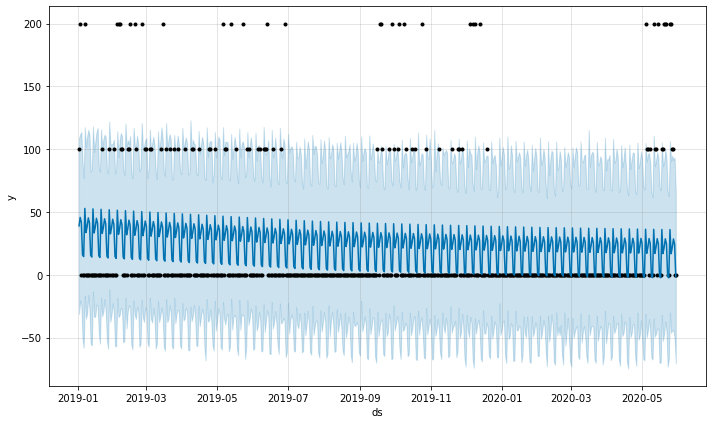

In [302]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [303]:
"""
Vemos que la serie temporal nos indica que casi siempre la localizacion es N/A lo cual no nos da mucha informacion
"""

'\nVemos que la serie temporal nos indica que casi siempre la localizacion es N/A lo cual no nos da mucha informacion\n'

In [304]:
# Make an Out-of-Sample Forecast

In [305]:
prophet_test_df

,ds,y
516,2020-06-01,0
517,2020-06-02,100
518,2020-06-03,0
519,2020-06-04,0
520,2020-06-05,200
...,...,...
564,2020-07-19,0
565,2020-07-20,200
566,2020-07-21,0
567,2020-07-22,200


In [306]:
future_out_sample_df=prophet_test_df.copy(deep=True)
future_out_sample_df

,ds,y
516,2020-06-01,0
517,2020-06-02,100
518,2020-06-03,0
519,2020-06-04,0
520,2020-06-05,200
...,...,...
564,2020-07-19,0
565,2020-07-20,200
566,2020-07-21,0
567,2020-07-22,200


In [307]:
future_out_sample_df=future_out_sample_df.drop(['y'], axis = 1)
future_out_sample_df

,ds
516,2020-06-01
517,2020-06-02
518,2020-06-03
519,2020-06-04
520,2020-06-05
...,...
564,2020-07-19
565,2020-07-20
566,2020-07-21
567,2020-07-22


In [308]:
future_out_sample_df.reset_index(level=0, inplace=True)
future_out_sample_df

,index,ds
0,516,2020-06-01
1,517,2020-06-02
2,518,2020-06-03
3,519,2020-06-04
4,520,2020-06-05
...,...,...
48,564,2020-07-19
49,565,2020-07-20
50,566,2020-07-21
51,567,2020-07-22


In [309]:
future_out_sample_df=future_out_sample_df.drop(['index'], axis = 1)
future_out_sample_df

,ds
0,2020-06-01
1,2020-06-02
2,2020-06-03
3,2020-06-04
4,2020-06-05
...,...
48,2020-07-19
49,2020-07-20
50,2020-07-21
51,2020-07-22


In [310]:
future_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [311]:
future_out_sample_df['ds']=to_datetime(future_out_sample_df['ds'])
future_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [312]:
# use the model to make a forecast
forecast_df = model.predict(future_out_sample_df)
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-01,17.664437,-37.922280,97.741213,17.664437,17.664437,18.230717,18.230717,18.230717,18.230717,18.230717,18.230717,0.0,0.0,0.0,35.895154
1,2020-06-02,17.648784,-51.138095,85.039714,17.648784,17.648784,-0.928813,-0.928813,-0.928813,-0.928813,-0.928813,-0.928813,0.0,0.0,0.0,16.719971
2,2020-06-03,17.633131,-46.823614,86.689107,17.633131,17.633131,4.052434,4.052434,4.052434,4.052434,4.052434,4.052434,0.0,0.0,0.0,21.685564
3,2020-06-04,17.617478,-38.393416,100.731203,17.617478,17.617894,10.846573,10.846573,10.846573,10.846573,10.846573,10.846573,0.0,0.0,0.0,28.464051
4,2020-06-05,17.601825,-43.879474,96.488292,17.601382,17.602947,6.822792,6.822792,6.822792,6.822792,6.822792,6.822792,0.0,0.0,0.0,24.424617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,2020-07-19,16.913090,-70.080998,63.958425,16.821689,17.016163,-20.187128,-20.187128,-20.187128,-20.187128,-20.187128,-20.187128,0.0,0.0,0.0,-3.274038
49,2020-07-20,16.897437,-37.085021,108.798615,16.802142,17.004040,18.230717,18.230717,18.230717,18.230717,18.230717,18.230717,0.0,0.0,0.0,35.128154
50,2020-07-21,16.881784,-50.132220,90.222998,16.783634,16.991732,-0.928813,-0.928813,-0.928813,-0.928813,-0.928813,-0.928813,0.0,0.0,0.0,15.952971
51,2020-07-22,16.866131,-44.302180,93.535229,16.764662,16.979568,4.052434,4.052434,4.052434,4.052434,4.052434,4.052434,0.0,0.0,0.0,20.918564


In [313]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds       yhat  yhat_lower  yhat_upper
0  2020-06-01  35.895154  -37.922280   97.741213
1  2020-06-02  16.719971  -51.138095   85.039714
2  2020-06-03  21.685564  -46.823614   86.689107
3  2020-06-04  28.464051  -38.393416  100.731203
4  2020-06-05  24.424617  -43.879474   96.488292
..        ...        ...         ...         ...
48 2020-07-19  -3.274038  -70.080998   63.958425
49 2020-07-20  35.128154  -37.085021  108.798615
50 2020-07-21  15.952971  -50.132220   90.222998
51 2020-07-22  20.918564  -44.302180   93.535229
52 2020-07-23  27.697051  -38.249620   95.500047

[53 rows x 4 columns]


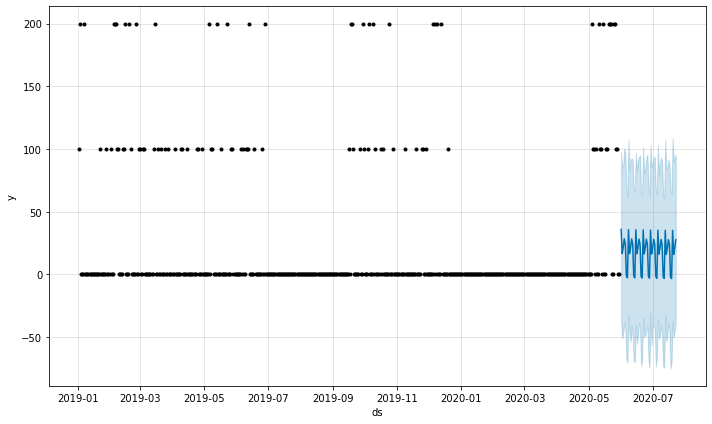

In [314]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [315]:
prophet_test_df

,ds,y
516,2020-06-01,0
517,2020-06-02,100
518,2020-06-03,0
519,2020-06-04,0
520,2020-06-05,200
...,...,...
564,2020-07-19,0
565,2020-07-20,200
566,2020-07-21,0
567,2020-07-22,200


In [316]:
# calculate MAE between expected and predicted values for the test period (MAE - Mean Absolute Error)
y_true = prophet_test_df['y'][:].values
y_pred = forecast_df['yhat'].values

In [317]:
y_true

array([  0, 100,   0,   0, 200,   0,   0, 100, 200, 200,   0, 200,   0,
         0, 200,   0,   0, 100, 200,   0,   0, 100,   0,   0,   0,   0,
         0,   0, 100,   0, 100, 100,   0,   0,   0, 200, 200,   0, 100,
       100,   0,   0, 200, 200, 100,   0, 100,   0,   0, 200,   0, 200,
       100])

In [318]:
y_pred

array([35.89515383, 16.71997059, 21.6855643 , 28.46405053, 24.42461657,
       -1.25040215, -2.61660959, 35.7855824 , 16.61039917, 21.57599288,
       28.35447911, 24.31504514, -1.35997358, -2.72618102, 35.67601097,
       16.50082774, 21.46642145, 28.24490768, 24.20547372, -1.469545  ,
       -2.83575245, 35.56643955, 16.39125631, 21.35685002, 28.13533625,
       24.09590229, -1.57911643, -2.94532387, 35.45686812, 16.28168489,
       21.2472786 , 28.02576482, 23.98633086, -1.68868786, -3.0548953 ,
       35.34729669, 16.17211346, 21.13770717, 27.9161934 , 23.87675944,
       -1.79825928, -3.16446673, 35.23772527, 16.06254203, 21.02813574,
       27.80662197, 23.76718801, -1.90783071, -3.27403816, 35.12815384,
       15.95297061, 20.91856431, 27.69705054])

Train MAE: 63.173
Train MSE: 8282.481
Train RMSE: 91.008


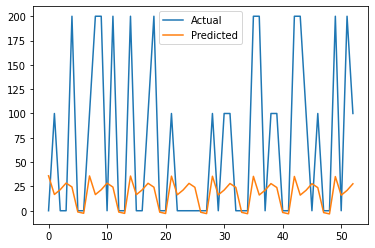

In [325]:
# calculate MAE between expected and predicted values for december
y_true = prophet_test_df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Train MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Train MSE: %.3f' % test_score)
print('Train RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [326]:
"""
CONCLUSION: como era de esperar el valor medio de la serie de la localizacion del modelo es cercano a '0' pq
la mayor parte de las transacciones tienen localizacion '0'.
Lo cual no nos permite hacer predicciones sobre la localizacion del usuario que practicamente solo hace viajes
'relamapago' de unos pocos dias.
"""

"\nCONCLUSION: como era de esperar el valor medio de la serie de la localizacion del modelo es cercano a '0' pq\nla mayor parte de las transacciones tienen localizacion '0'.\nLo cual no nos permite hacer predicciones sobre la localizacion del usuario que practicamente solo hace viajes\n'relamapago' de unos pocos dias.\n"

In [327]:
"""
A continuacion vamos a plotear la prediccion junto al dataset completo para ver lo bien que hemos afinado dentro del conjunto
del contexto entero de datos.
"""

'\nA continuacion vamos a plotear la prediccion junto al dataset completo para ver lo bien que hemos afinado dentro del conjunto\ndel contexto entero de datos.\n'

In [328]:
df

,ds,y
0,2019-01-02,100
1,2019-01-03,200
2,2019-01-04,0
3,2019-01-05,0
4,2019-01-06,0
...,...,...
564,2020-07-19,0
565,2020-07-20,200
566,2020-07-21,0
567,2020-07-22,200


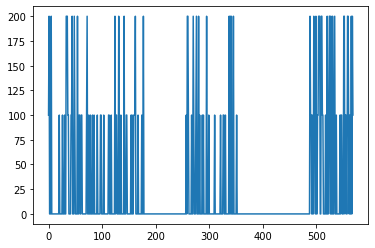

In [329]:
df['y'].plot()
pyplot.show()

In [330]:
df.index[df['ds'] == '2019-01-02']

Int64Index([0], dtype='int64')

In [331]:
df.index[df['ds'] == '2020-06-01']

Int64Index([516], dtype='int64')

In [333]:
# split into train and test sets
X = df.values
train_size = int(516)
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [334]:
train_X.shape, train_X

((516,),
 array([Timestamp('2019-01-02 00:00:00'), Timestamp('2019-01-03 00:00:00'),
        Timestamp('2019-01-04 00:00:00'), Timestamp('2019-01-05 00:00:00'),
        Timestamp('2019-01-06 00:00:00'), Timestamp('2019-01-07 00:00:00'),
        Timestamp('2019-01-08 00:00:00'), Timestamp('2019-01-09 00:00:00'),
        Timestamp('2019-01-10 00:00:00'), Timestamp('2019-01-11 00:00:00'),
        Timestamp('2019-01-12 00:00:00'), Timestamp('2019-01-13 00:00:00'),
        Timestamp('2019-01-14 00:00:00'), Timestamp('2019-01-15 00:00:00'),
        Timestamp('2019-01-16 00:00:00'), Timestamp('2019-01-17 00:00:00'),
        Timestamp('2019-01-18 00:00:00'), Timestamp('2019-01-19 00:00:00'),
        Timestamp('2019-01-20 00:00:00'), Timestamp('2019-01-21 00:00:00'),
        Timestamp('2019-01-22 00:00:00'), Timestamp('2019-01-23 00:00:00'),
        Timestamp('2019-01-24 00:00:00'), Timestamp('2019-01-25 00:00:00'),
        Timestamp('2019-01-26 00:00:00'), Timestamp('2019-01-27 00:00:00'),
   

In [335]:
train_y.shape, train_y

((516,),
 array([100, 200, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 100, 0, 0, 200, 200, 200, 100,
        100, 0, 0, 0, 0, 100, 100, 200, 0, 0, 0, 200, 100, 0, 0, 0, 0, 200,
        0, 0, 100, 100, 0, 0, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 100, 200,
        0, 0, 100, 0, 0, 100, 0, 0, 0, 100, 0, 0, 100, 0, 0, 0, 0, 0, 100,
        0, 0, 0, 0, 0, 100, 100, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0,
        100, 100, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 200, 0, 100, 100, 0, 0,
        0, 200, 0, 0, 0, 100, 0, 0, 0, 0, 0, 200, 0, 0, 0, 100, 100, 0, 0,
        0, 0, 0, 0, 0, 100, 0, 100, 0, 0, 100, 100, 100, 200, 0, 0, 0, 0,
        100, 0, 0, 0, 0, 0, 0, 100, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 100, 0

In [336]:
test_X.shape, test_X

((53,),
 array([Timestamp('2020-06-01 00:00:00'), Timestamp('2020-06-02 00:00:00'),
        Timestamp('2020-06-03 00:00:00'), Timestamp('2020-06-04 00:00:00'),
        Timestamp('2020-06-05 00:00:00'), Timestamp('2020-06-06 00:00:00'),
        Timestamp('2020-06-07 00:00:00'), Timestamp('2020-06-08 00:00:00'),
        Timestamp('2020-06-09 00:00:00'), Timestamp('2020-06-10 00:00:00'),
        Timestamp('2020-06-11 00:00:00'), Timestamp('2020-06-12 00:00:00'),
        Timestamp('2020-06-13 00:00:00'), Timestamp('2020-06-14 00:00:00'),
        Timestamp('2020-06-15 00:00:00'), Timestamp('2020-06-16 00:00:00'),
        Timestamp('2020-06-17 00:00:00'), Timestamp('2020-06-18 00:00:00'),
        Timestamp('2020-06-19 00:00:00'), Timestamp('2020-06-20 00:00:00'),
        Timestamp('2020-06-21 00:00:00'), Timestamp('2020-06-22 00:00:00'),
        Timestamp('2020-06-23 00:00:00'), Timestamp('2020-06-24 00:00:00'),
        Timestamp('2020-06-25 00:00:00'), Timestamp('2020-06-26 00:00:00'),
    

In [337]:
test_y.shape, test_y

((53,),
 array([0, 100, 0, 0, 200, 0, 0, 100, 200, 200, 0, 200, 0, 0, 200, 0, 0,
        100, 200, 0, 0, 100, 0, 0, 0, 0, 0, 0, 100, 0, 100, 100, 0, 0, 0,
        200, 200, 0, 100, 100, 0, 0, 200, 200, 100, 0, 100, 0, 0, 200, 0,
        200, 100], dtype=object))

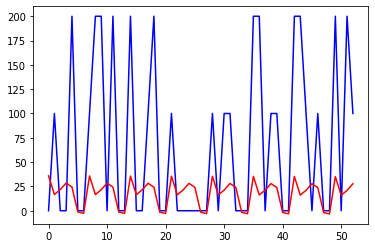

In [338]:
# plot predictions vs expected
pyplot.plot(test_y, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

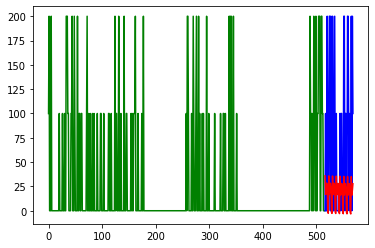

In [339]:
# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_pred], color='red') # y en predictions - en rojo
pyplot.show()

In [341]:
"""
Por ultimo vamos a hacer una prediccion con prophet para el dataset entero con el modelo entrenado hasta 2020-07-23
y vamos a representar valor real frente a predicho para poder ver de una manera más general lo bien o mal que
aproxima prophet
"""

'\nPor ultimo vamos a hacer una prediccion con prophet para el dataset entero con el modelo entrenado hasta 2020-05-30\ny vamos a representar valor real frente a predicho para poder ver de una manera más general lo bien o mal que\naproxima prophet\n'

In [343]:
df.shape

(569, 2)

In [344]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [345]:
future_in_out_sample_df = df.copy(deep=True)

In [346]:
future_in_out_sample_df=future_in_out_sample_df.drop(['y'], axis = 1)

In [347]:
future_in_out_sample_df

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-05
4,2019-01-06
...,...
564,2020-07-19
565,2020-07-20
566,2020-07-21
567,2020-07-22


In [348]:
future_in_out_sample_df['ds']=to_datetime(future_in_out_sample_df['ds'])

In [349]:
future_in_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [350]:
# use the model to make a forecast
forecast_df = model.predict(future_in_out_sample_df)

In [351]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,34.930096,-25.142181,109.365671,34.930096,34.930096,4.052434,4.052434,4.052434,4.052434,4.052434,4.052434,0.0,0.0,0.0,38.982530
1,2019-01-03,34.878210,-24.304580,114.811254,34.878210,34.878210,10.846573,10.846573,10.846573,10.846573,10.846573,10.846573,0.0,0.0,0.0,45.724783
2,2019-01-04,34.826324,-25.876969,117.423275,34.826324,34.826324,6.822792,6.822792,6.822792,6.822792,6.822792,6.822792,0.0,0.0,0.0,41.649116
3,2019-01-05,34.774438,-51.491860,87.939054,34.774438,34.774438,-18.836574,-18.836574,-18.836574,-18.836574,-18.836574,-18.836574,0.0,0.0,0.0,15.937864
4,2019-01-06,34.722552,-57.942044,84.105702,34.722552,34.722552,-20.187128,-20.187128,-20.187128,-20.187128,-20.187128,-20.187128,0.0,0.0,0.0,14.535424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2020-07-19,16.913090,-76.519393,63.650363,16.815903,17.016790,-20.187128,-20.187128,-20.187128,-20.187128,-20.187128,-20.187128,0.0,0.0,0.0,-3.274038
565,2020-07-20,16.897437,-37.884528,104.179943,16.797104,17.005119,18.230717,18.230717,18.230717,18.230717,18.230717,18.230717,0.0,0.0,0.0,35.128154
566,2020-07-21,16.881784,-51.878393,83.690595,16.778584,16.993562,-0.928813,-0.928813,-0.928813,-0.928813,-0.928813,-0.928813,0.0,0.0,0.0,15.952971
567,2020-07-22,16.866131,-50.433428,89.425896,16.759583,16.982316,4.052434,4.052434,4.052434,4.052434,4.052434,4.052434,0.0,0.0,0.0,20.918564


In [352]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds       yhat  yhat_lower  yhat_upper
0   2019-01-02  38.982530  -25.142181  109.365671
1   2019-01-03  45.724783  -24.304580  114.811254
2   2019-01-04  41.649116  -25.876969  117.423275
3   2019-01-05  15.937864  -51.491860   87.939054
4   2019-01-06  14.535424  -57.942044   84.105702
..         ...        ...         ...         ...
564 2020-07-19  -3.274038  -76.519393   63.650363
565 2020-07-20  35.128154  -37.884528  104.179943
566 2020-07-21  15.952971  -51.878393   83.690595
567 2020-07-22  20.918564  -50.433428   89.425896
568 2020-07-23  27.697051  -44.570284   95.933828

[569 rows x 4 columns]


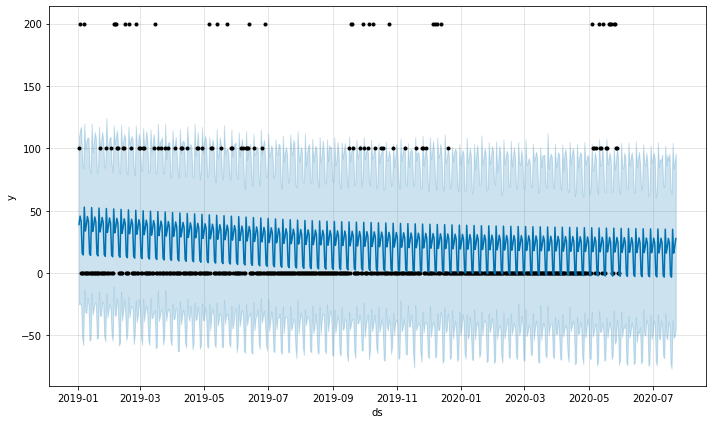

In [353]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

Total MAE: 38.978
Total MSE: 3359.373
Total RMSE: 57.960


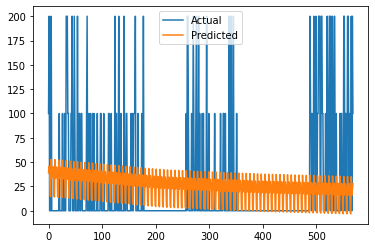

In [354]:
# calculate MAE between expected and predicted values for december
y_true = df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Total MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Total MSE: %.3f' % test_score)
print('Total RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [355]:
"""
Hace correctamente la prediccion pero esto no nos da ninguna informacion util ya que nos indica que la mayor 
parte de las transacciones no tiene datos de localizacion y así será en el futuro.
Además en la reu con aromerales de 20211007 ya se me indico que la localizacion COUNTRY='Global' no corresponde
a una localizacion sino a proveedores de servicios con cobertura nacional completa: Iberdrola, Endesa, Masmovil.
"""

"\nHace correctamente la prediccion pero esto no nos da ninguna informacion util ya que nos indica que la mayor \nparte de las transacciones no tiene datos de localizacion y así será en el futuro.\nAdemás en la reu con aromerales de 20211007 ya se me indico que la localizacion COUNTRY='Global' no corresponde\na una localizacion sino a proveedores de servicios con cobertura nacional completa: Iberdrola, Endesa, Masmovil.\n"

In [356]:
df

,ds,y
0,2019-01-02,100
1,2019-01-03,200
2,2019-01-04,0
3,2019-01-05,0
4,2019-01-06,0
...,...,...
564,2020-07-19,0
565,2020-07-20,200
566,2020-07-21,0
567,2020-07-22,200


In [358]:
df.index[df['ds'] == '2019-01-02']

Int64Index([0], dtype='int64')

In [359]:
df.index[df['ds'] == '2020-06-01']

Int64Index([516], dtype='int64')

In [360]:
df.index[df['ds'] == '2020-07-23']

Int64Index([568], dtype='int64')

In [365]:
# split into train and test sets
X = df.values
train_size = int(516)
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [366]:
train_X.shape, train_X

((516,),
 array([Timestamp('2019-01-02 00:00:00'), Timestamp('2019-01-03 00:00:00'),
        Timestamp('2019-01-04 00:00:00'), Timestamp('2019-01-05 00:00:00'),
        Timestamp('2019-01-06 00:00:00'), Timestamp('2019-01-07 00:00:00'),
        Timestamp('2019-01-08 00:00:00'), Timestamp('2019-01-09 00:00:00'),
        Timestamp('2019-01-10 00:00:00'), Timestamp('2019-01-11 00:00:00'),
        Timestamp('2019-01-12 00:00:00'), Timestamp('2019-01-13 00:00:00'),
        Timestamp('2019-01-14 00:00:00'), Timestamp('2019-01-15 00:00:00'),
        Timestamp('2019-01-16 00:00:00'), Timestamp('2019-01-17 00:00:00'),
        Timestamp('2019-01-18 00:00:00'), Timestamp('2019-01-19 00:00:00'),
        Timestamp('2019-01-20 00:00:00'), Timestamp('2019-01-21 00:00:00'),
        Timestamp('2019-01-22 00:00:00'), Timestamp('2019-01-23 00:00:00'),
        Timestamp('2019-01-24 00:00:00'), Timestamp('2019-01-25 00:00:00'),
        Timestamp('2019-01-26 00:00:00'), Timestamp('2019-01-27 00:00:00'),
   

In [367]:
train_y.shape, train_y

((516,),
 array([100, 200, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 100, 0, 0, 200, 200, 200, 100,
        100, 0, 0, 0, 0, 100, 100, 200, 0, 0, 0, 200, 100, 0, 0, 0, 0, 200,
        0, 0, 100, 100, 0, 0, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 100, 200,
        0, 0, 100, 0, 0, 100, 0, 0, 0, 100, 0, 0, 100, 0, 0, 0, 0, 0, 100,
        0, 0, 0, 0, 0, 100, 100, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0,
        100, 100, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 200, 0, 100, 100, 0, 0,
        0, 200, 0, 0, 0, 100, 0, 0, 0, 0, 0, 200, 0, 0, 0, 100, 100, 0, 0,
        0, 0, 0, 0, 0, 100, 0, 100, 0, 0, 100, 100, 100, 200, 0, 0, 0, 0,
        100, 0, 0, 0, 0, 0, 0, 100, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 100, 0

In [368]:
test_y.shape, test_y

((53,),
 array([0, 100, 0, 0, 200, 0, 0, 100, 200, 200, 0, 200, 0, 0, 200, 0, 0,
        100, 200, 0, 0, 100, 0, 0, 0, 0, 0, 0, 100, 0, 100, 100, 0, 0, 0,
        200, 200, 0, 100, 100, 0, 0, 200, 200, 100, 0, 100, 0, 0, 200, 0,
        200, 100], dtype=object))

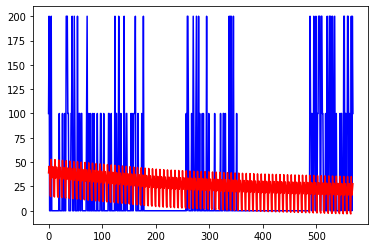

In [369]:
# plot predictions vs expected
pyplot.plot(y_true, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

In [370]:
y_pred.size, y_pred

(569,
 array([ 3.89825295e+01,  4.57247828e+01,  4.16491159e+01,  1.59378642e+01,
         1.45354238e+01,  5.29013828e+01,  3.36899666e+01,  3.86193274e+01,
         4.53615807e+01,  4.12859137e+01,  1.55746621e+01,  1.41722217e+01,
         5.25381807e+01,  3.33267645e+01,  3.82561253e+01,  4.49983785e+01,
         4.09227116e+01,  1.52114599e+01,  1.38090195e+01,  5.21749786e+01,
         3.29635624e+01,  3.78929231e+01,  4.46351764e+01,  4.05595095e+01,
         1.48482578e+01,  1.34458174e+01,  5.18117764e+01,  3.26003602e+01,
         3.75297210e+01,  4.42719742e+01,  4.01963073e+01,  1.44850556e+01,
         1.30826152e+01,  5.14485743e+01,  3.22371581e+01,  3.71665188e+01,
         4.39087721e+01,  3.98331052e+01,  1.41218535e+01,  1.27194131e+01,
         5.10853721e+01,  3.18739559e+01,  3.68033167e+01,  4.35455699e+01,
         3.94699030e+01,  1.37586513e+01,  1.23562109e+01,  5.07221700e+01,
         3.15107538e+01,  3.64401145e+01,  4.31823678e+01,  3.91067008e+01,
      

In [371]:
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds       yhat  yhat_lower  yhat_upper
0   2019-01-02  38.982530  -25.142181  109.365671
1   2019-01-03  45.724783  -24.304580  114.811254
2   2019-01-04  41.649116  -25.876969  117.423275
3   2019-01-05  15.937864  -51.491860   87.939054
4   2019-01-06  14.535424  -57.942044   84.105702
..         ...        ...         ...         ...
564 2020-07-19  -3.274038  -76.519393   63.650363
565 2020-07-20  35.128154  -37.884528  104.179943
566 2020-07-21  15.952971  -51.878393   83.690595
567 2020-07-22  20.918564  -50.433428   89.425896
568 2020-07-23  27.697051  -44.570284   95.933828

[569 rows x 4 columns]


In [372]:
forecast_unseen_df=forecast_df[516:]
forecast_unseen_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
516,2020-06-01,17.664437,-30.618021,104.374989,17.664437,17.664437,18.230717,18.230717,18.230717,18.230717,18.230717,18.230717,0.0,0.0,0.0,35.895154
517,2020-06-02,17.648784,-51.232035,84.544008,17.648784,17.648784,-0.928813,-0.928813,-0.928813,-0.928813,-0.928813,-0.928813,0.0,0.0,0.0,16.719971
518,2020-06-03,17.633131,-43.453796,84.118749,17.633131,17.633157,4.052434,4.052434,4.052434,4.052434,4.052434,4.052434,0.0,0.0,0.0,21.685564
519,2020-06-04,17.617478,-44.002666,96.508279,17.617413,17.617959,10.846573,10.846573,10.846573,10.846573,10.846573,10.846573,0.0,0.0,0.0,28.464051
520,2020-06-05,17.601825,-40.376542,92.584821,17.601381,17.602700,6.822792,6.822792,6.822792,6.822792,6.822792,6.822792,0.0,0.0,0.0,24.424617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2020-07-19,16.913090,-76.519393,63.650363,16.815903,17.016790,-20.187128,-20.187128,-20.187128,-20.187128,-20.187128,-20.187128,0.0,0.0,0.0,-3.274038
565,2020-07-20,16.897437,-37.884528,104.179943,16.797104,17.005119,18.230717,18.230717,18.230717,18.230717,18.230717,18.230717,0.0,0.0,0.0,35.128154
566,2020-07-21,16.881784,-51.878393,83.690595,16.778584,16.993562,-0.928813,-0.928813,-0.928813,-0.928813,-0.928813,-0.928813,0.0,0.0,0.0,15.952971
567,2020-07-22,16.866131,-50.433428,89.425896,16.759583,16.982316,4.052434,4.052434,4.052434,4.052434,4.052434,4.052434,0.0,0.0,0.0,20.918564


In [373]:
y_unseen_pred = forecast_unseen_df['yhat'].values

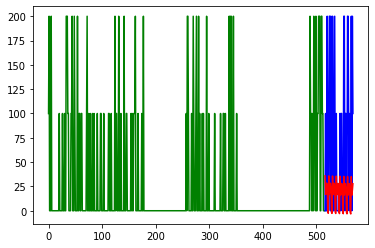

In [374]:
# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_unseen_pred], color='red') # y en predictions - en rojo
pyplot.show()

In [375]:
"""
CONCLUSION FINAL:
No podemos predecir la localizacion en funcion del tiempo como una serie temporal predicha por ej con prophet 
porque kas localizaciones habría que codificarles mediante one hot enconding y solo en España puede haber más de
6000 pueblos.

Además COUNTRY='Global' corresponde a proveedores de servicios con cobertura nacional completa como Iberdrola,
Endesa, Masmovil
y NAME_CAT=Otros gastos personales corresponde a proveedores que venden todo tipo de productos tipo Amazon o 
El Corte Ingles.

Por tanto lo que haremos será con el próximo dataset (uno que me buscará Andrés o Megumi) las 5 localizaciones
que más transacciones tengan. Para cada localizacion ver en que 4 meses (por ejemplo) hay más transacciones y
también ver las 5 categorías que más transacciones tengan para cada localizacion.
Con esa informacion podremos hacer, de forma rápida y ligera, predicciones de localizacion del usuario por meses,
cuanto se gasta en cada localizacion el usuario y en que categorías principales.
"""

"\nCONCLUSION FINAL:\nNo podemos predecir la localizacion en funcion del tiempo como una serie temporal predicha por ej con prophet \nporque kas localizaciones habría que codificarles mediante one hot enconding y solo en España puede haber más de\n6000 pueblos.\n\nAdemás COUNTRY='Global' corresponde a proveedores de servicios con cobertura nacional completa como Iberdrola,\nEndesa, Masmovil\ny NAME_CAT=Otros gastos personales corresponde a proveedores que venden todo tipo de productos tipo Amazon o \nEl Corte Ingles.\n\nPor tanto lo que haremos será con el próximo dataset (uno que me buscará Andrés o Megumi) las 5 localizaciones\nque más transacciones tengan. Para cada localizacion ver en que 4 meses (por ejemplo) hay más transacciones y\ntambién ver las 5 categorías que más transacciones tengan para cada localizacion.\nCon esa informacion podremos hacer, de forma rápida y ligera, predicciones de localizacion del usuario por meses,\ncuanto se gasta en cada localizacion el usuario y en 

In [562]:
"""
Vamos a representar la serie temporal de las transacciones de siguiente manera:

1-A la localización de España la asignamos el valor de '1.0'
2-A la localización de Global la asignamos el valor de '0.1'
3-Agrupamos y sumamos las transacciones por fechas y
3.1- si el valor es entero es 'España' y le asignamos el valor de '5'
3.2- si el valor es decimal es 'Global' o 'Viaje' y le asignamos el valor de '10'
4-Rellenamos los dias que no tengan transaccion con '0'
5-Pintamos la serie temporal y vemos si tiene estacionalidad y los viajes coinciden con 'vacaciones' o 'fiestas'
6-Hacemos otra serie rellenado los dias que no tengan transaccion con el ultimo valor valido anterior
7-Pintamos la OTRA serie temporal y vemos si tiene estacionalidad y los viajes coinciden con 'vacaciones' o 
'fiestas'
"""

"\nVamos a representar la serie temporal de las transacciones de siguiente manera:\n\n1-A la localización de España la asignamos el valor de '1.0'\n2-A la localización de Global la asignamos el valor de '0.1'\n3-Agrupamos y sumamos las transacciones por fechas y\n3.1- si el valor es entero es 'España' y le asignamos el valor de '5'\n3.2- si el valor es decimal es 'Global' o 'Viaje' y le asignamos el valor de '10'\n4-Rellenamos los dias que no tengan transaccion con '0'\n5-Pintamos la serie temporal y vemos si tiene estacionalidad y los viajes coinciden con 'vacaciones' o 'fiestas'\n6-Hacemos otra serie rellenado los dias que no tengan transaccion con el ultimo valor valido anterior\n7-Pintamos la OTRA serie temporal y vemos si tiene estacionalidad y los viajes coinciden con 'vacaciones' o \n'fiestas'\n"

In [121]:
"""
HOJA DE RUTA 20210930:
0-nos quedamos con las transacciones del año 2019 y 2020 y volvemos a hacer estadisticas
1-quita las rows donde CITY y COUNTRY sean NaN
2-donde CITY sea distinto a NaN en COUNTRY pones España
3-donde COUNTRY sea Andorra en CITY pongo Andorra
4-continuas el analisis estadistico
5-mostrar por codigo de barras las observaciones en cada localizacion
6-serie temporal de localizacion del usuario en funcion del tiempo
7-cotejar con semana y festivos
"""

'\nPOR AQUI TE QUEDAS:\n1-quita las rows donde CITY y COUNTRY sean NaN\n2-donde CITY sea distinto a NaN en COUNTRY pones España\n3-continuas el analisis estadistico\n'

In [274]:
"""
20210930 reu con aromerales
<<<<
ver la localizacion del usuario en funcion del tiempo y cotejarlo con semana santa y festivos nacionales
para ver donde viaja en puentes y semana santa o si viaja
>>>>
"""

'\n20210930 reu con aromerales\n<<<<\nver la localizacion del usuario en funcion del tiempo y cotejarlo con semana santa y festivos nacionales\npara ver donde viaja en puentes y semana santa o si viaja\n>>>>\n'

In [ ]:
# 20210916 samu:

# Buenas Pedro,

# Te envió otros de los datasets que te enviamos, añadiendo los campos de localización. 
# De los dataset que adjunto, el que más transacciones tiene localizadas parece que es el de Megumi. 

# Saludos